## Importing all the required Libraries 

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector as selector
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from scipy.stats import shapiro

## Defining all the functions 

## Reading the data file 

In [2]:
car_data = pd.read_csv("car_data_cleaned.csv")

### Viewing the dataframe 

In [3]:
car_data

,Unnamed: 0,Car_Make_Model_Style,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),...,Displacement (L),Displacement (cc),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,0,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3790.0,...,2.0,122.0,235.0,235.0,19.0,19.0,1.0,1.0,5.0,2019.0
1,1,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3829.0,...,2.0,122.0,235.0,235.0,19.0,19.0,1.0,1.0,5.0,2019.0
2,2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3821.0,...,2.0,122.0,255.0,255.0,20.0,20.0,1.0,1.0,4.0,2019.0
3,3,2019 Acura RDX Specs: FWD,37400.0,FWD,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3783.0,...,2.0,122.0,235.0,235.0,19.0,19.0,1.0,1.0,5.0,2019.0
4,4,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 4WD,4026.0,...,2.0,122.0,235.0,235.0,19.0,19.0,1.0,1.0,5.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11452,11452,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,T5 AWD Platinum,All Wheel Drive,5,4,4dr Car,Mid-Size Station Wagon,3920.0,...,2.0,120.0,235.0,235.0,18.0,18.0,1.0,1.0,5.0,2018.0
11453,11453,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,4dr Wgn T5 AWD,All Wheel Drive,5,4,4dr Car,Mid-Size Station Wagon,3602.0,...,2.0,154.0,235.0,235.0,18.0,18.0,1.0,1.0,5.0,2016.0
11454,11454,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,4dr Wgn T5 Platinum AWD,All Wheel Drive,5,4,4dr Car,Mid-Size Station Wagon,3602.0,...,2.0,154.0,235.0,235.0,18.0,18.0,1.0,1.0,5.0,2016.0
11455,11455,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,2015.5 4dr Wgn T5 AWD,All Wheel Drive,5,4,4dr Car,Mid-Size Station Wagon,3602.0,...,2.0,154.0,235.0,235.0,18.0,18.0,1.0,1.0,5.0,2015.0


### Checking for Null Values

After data exploration, it is noticed that there are lot of null values present in both the categorical and numerical valued columns. These null values are tackled by imputation. This is considered better than removing the null values becasue they have help retain a lot of information while not recursivly adding any additonal bias. 

For the Categorical columns the values have been imputed by replacing them with mode (frequently appeared values in that section).

For numerical columns the values have been imputed using Regression Imputation, this is considered better than replacing the missing values with mean or median because it considers the correlation between columns with all other numerical columns and also reduce any additional bias. 

In [4]:
def imputing_categorical_values(df,categorical_column):
    # Create new column and replace if category is null with 1 else 0
    df[categorical_column+"_Imputed"]=np.where(df[categorical_column].isnull(),1,0)
    
    #Take most frequent occured category
    Mode_Category = df[categorical_column].mode()[0]
    
    #Replace NAN values with most occured category in actual variable
    df[categorical_column].fillna(Mode_Category,inplace=True)


In [5]:
for Columns in ['EPA Classification','Fuel System','Steering Type','Suspension Type - Front','Suspension Type - Rear','Corrosion Miles/km','Engine Configuration','Engine Class']:
    imputing_categorical_values(car_data,Columns)
    
car_data.head()

,Unnamed: 0,Car_Make_Model_Style,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),...,Tire Ratio,Year,EPA Classification_Imputed,Fuel System_Imputed,Steering Type_Imputed,Suspension Type - Front_Imputed,Suspension Type - Rear_Imputed,Corrosion Miles/km_Imputed,Engine Configuration_Imputed,Engine Class_Imputed
0,0,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3790.0,...,5.0,2019.0,0,0,0,0,0,0,0,0
1,1,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3829.0,...,5.0,2019.0,0,0,0,0,0,0,0,0
2,2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3821.0,...,4.0,2019.0,0,0,0,0,0,0,0,0
3,3,2019 Acura RDX Specs: FWD,37400.0,FWD,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3783.0,...,5.0,2019.0,0,0,0,0,0,0,0,0
4,4,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 4WD,4026.0,...,5.0,2019.0,0,0,0,0,0,0,0,0


In [7]:
x_num_col = car_data.select_dtypes(include=[np.number]).values
# Creating a regression imputer 
imputer = IterativeImputer(estimator=LinearRegression(), random_state=0)

#Fitting the data to the imputer
imputer.fit(x_num_col)
x_imputed = imputer.transform(x_num_col)
car_data[car_data.select_dtypes(include=[np.number]).columns] = x_imputed
car_data.to_csv('new_car_imputed_data.csv', index=False)

In [8]:
car_data.isnull().sum()

Unnamed: 0                         0
Car_Make_Model_Style               0
MSRP                               0
Style Name                         0
Drivetrain                         0
                                  ..
Suspension Type - Front_Imputed    0
Suspension Type - Rear_Imputed     0
Corrosion Miles/km_Imputed         0
Engine Configuration_Imputed       0
Engine Class_Imputed               0
Length: 95, dtype: int64

In [8]:
car_data.drop(['EPA Classification_Imputed','Fuel System_Imputed','Steering Type_Imputed','Suspension Type - Front_Imputed','Suspension Type - Rear_Imputed','Corrosion Miles/km_Imputed','Engine Configuration_Imputed','Engine Class_Imputed'],axis = 1,   inplace = True)

### Exploratory Data Analysis 

After analysing all the columns in the dataset one by one to conduct a deeper analysis and comparing each of the column's relationship with the target variable. The following as been concluded :
1. Airbag Frontal Drive - has only value True (which signifies that all cars have this feature), thus is not effecting the price. 
2. Airbag Frontal Passenger - contains only values True (which signifies that all cars have this feature),thus is not effecting the price. 
3. Displacement (L) - is highly correlated (0.99799) with Displacement(cc). This is because for a given value in Displacement (L) (Volume of engine) there is certain range of  engine displacement in Displacement (cc).These values in cc increases with increase in Displacement(L). Thus there dependencies on Price are similar as a result this column is omitted.
4. Rear Wheel Size - is highly correlated (0.9964) with front wheel size. Thus there dependencies on the target variable will be similar.
5. Fuel Economy Est City (MPG) & Fuel Economy Est Hwy (MPG) - is highly correlated(0.98) with Fuel Economy Combined(MPG). The fuel economy combined is the average of the fuel economy in city (65%) and fuel economy in highway (45%). Thus the combined acts as a better feature to determine the price. 



In [9]:
deleting_columns = ['Rear Wheel Size','Displacement (L)','Air Bag-Frontal-Driver','Air Bag-Frontal-Passenger','EPA Fuel Economy Est - Hwy (MPG)','EPA Fuel Economy Est - City (MPG)']

In [10]:
dropped_car_data = car_data.drop(deleting_columns, axis = 1)

In [11]:
dropped_car_data

,Unnamed: 0,Car_Make_Model_Style,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),...,Engine Configuration,Engine Class,Displacement (cc),Rear Tire Width,Front Tire Width,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,0.0,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,FWD w/Technology Pkg,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3790.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
1,1.0,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,FWD w/Advance Pkg,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3829.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
2,2.0,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,FWD w/A-Spec Pkg,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3821.0,...,I,Turbocharged,122.0,255.0,255.0,20.0,1.0,1.0,4.0,2019.0
3,3.0,2019 Acura RDX Specs: FWD,37400.0,FWD,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3783.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
4,4.0,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,AWD w/Technology Pkg,All Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 4WD,4026.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11452,11452.0,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,T5 AWD Platinum,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3920.0,...,I,Intercooled,120.0,235.0,235.0,18.0,1.0,1.0,5.0,2018.0
11453,11453.0,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,4dr Wgn T5 AWD,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3602.0,...,I,Intercooled,154.0,235.0,235.0,18.0,1.0,1.0,5.0,2016.0
11454,11454.0,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,4dr Wgn T5 Platinum AWD,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3602.0,...,I,Intercooled,154.0,235.0,235.0,18.0,1.0,1.0,5.0,2016.0
11455,11455.0,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,2015.5 4dr Wgn T5 AWD,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3602.0,...,I,Intercooled,154.0,235.0,235.0,18.0,1.0,1.0,5.0,2015.0


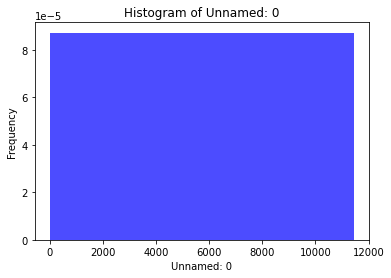

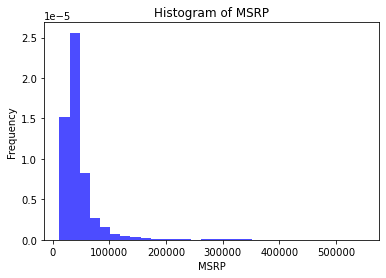

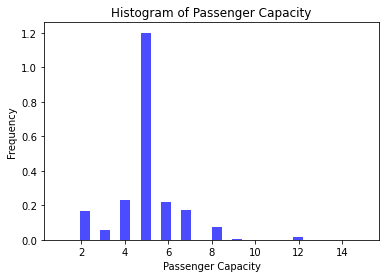

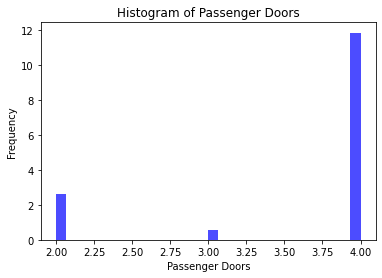

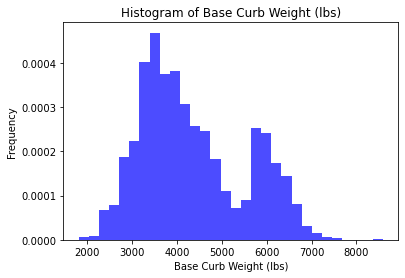

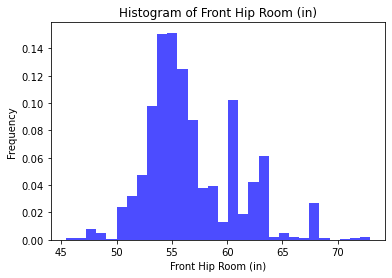

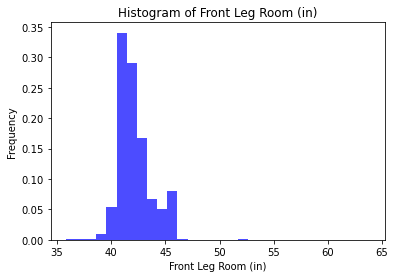

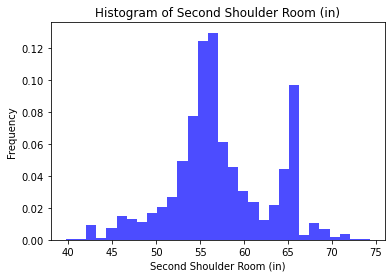

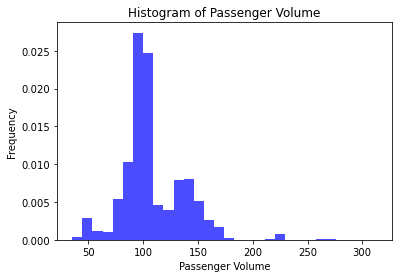

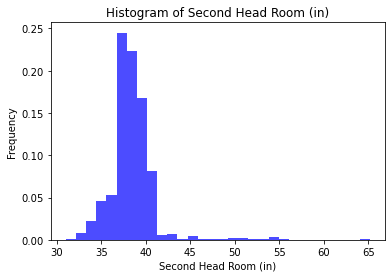

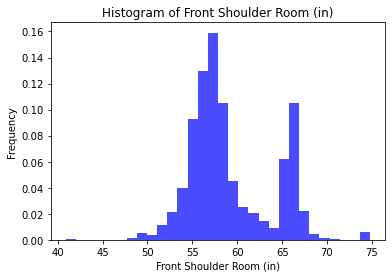

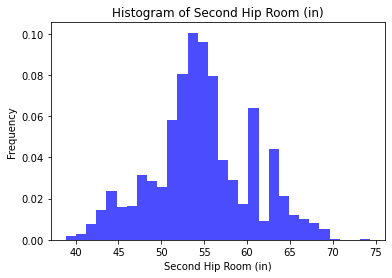

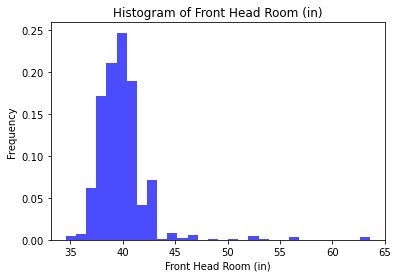

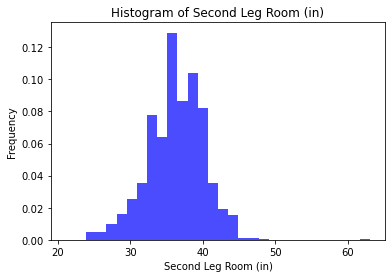

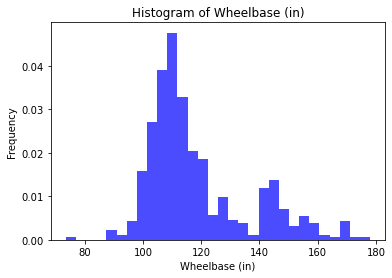

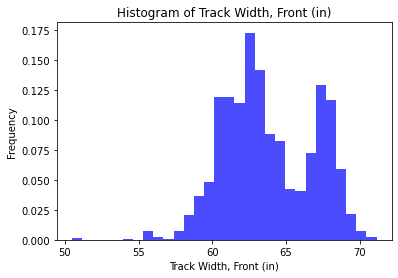

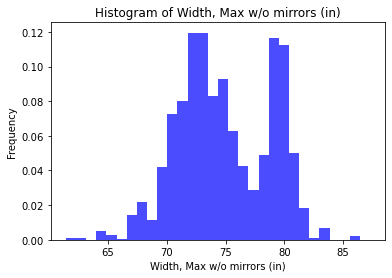

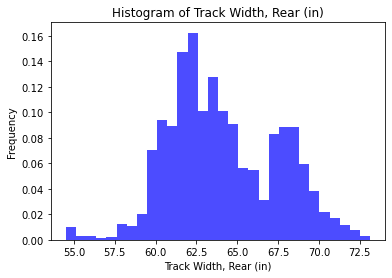

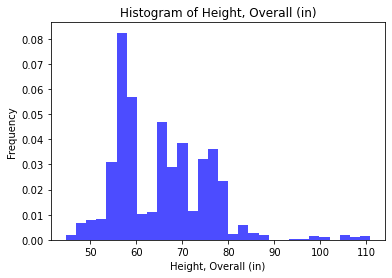

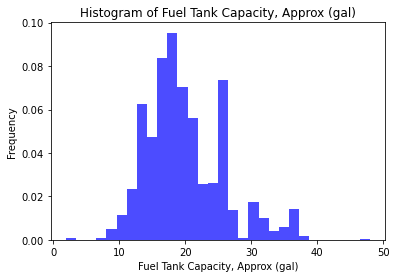

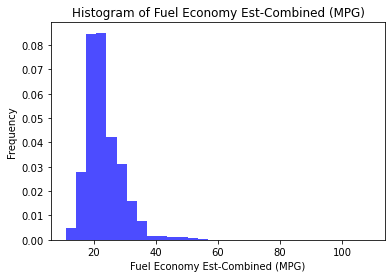

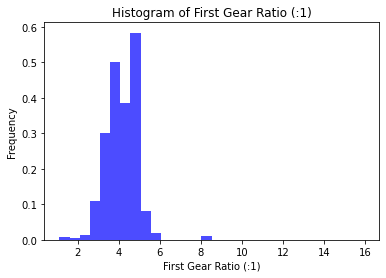

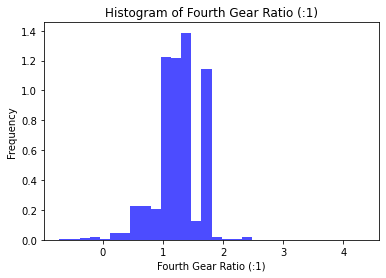

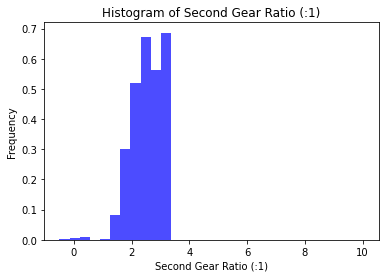

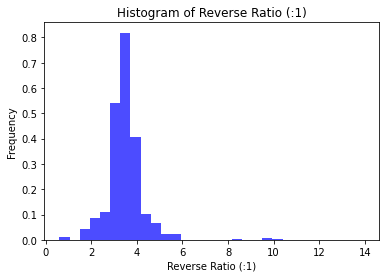

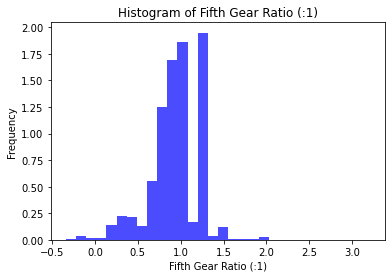

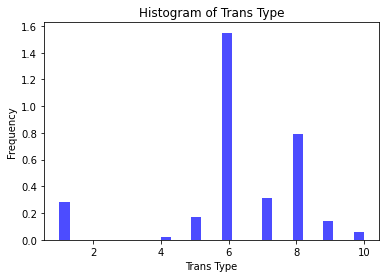

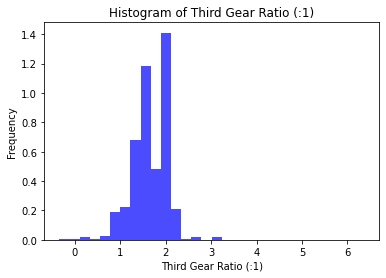

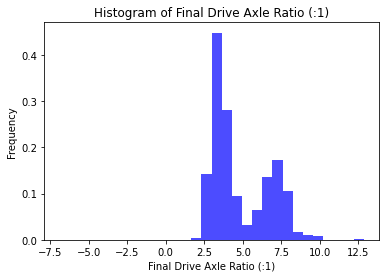

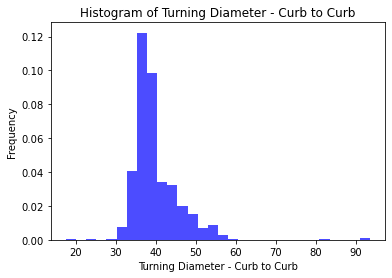

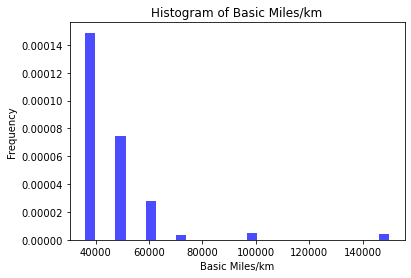

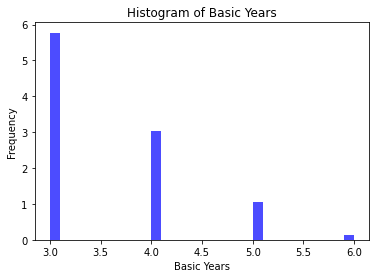

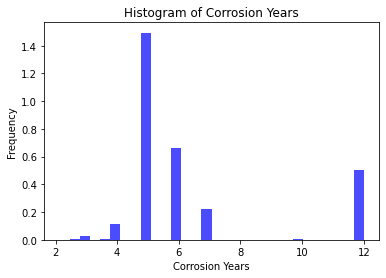

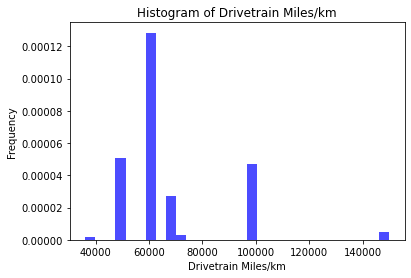

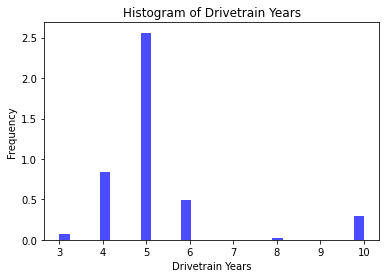

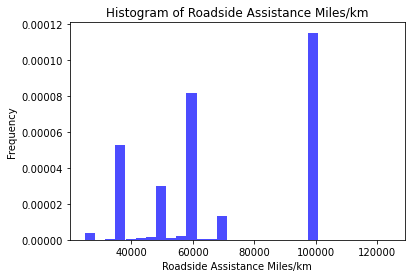

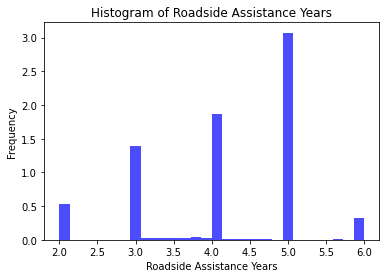

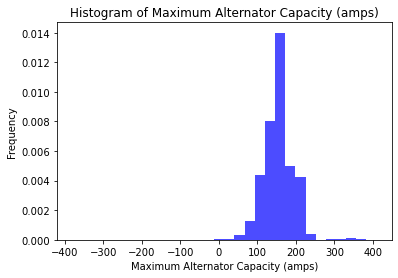

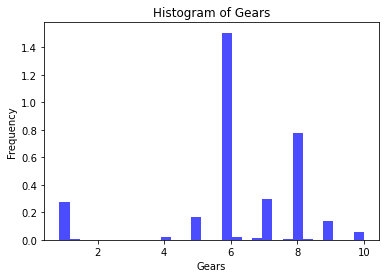

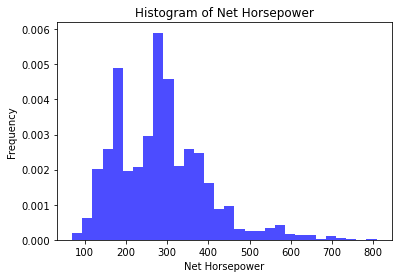

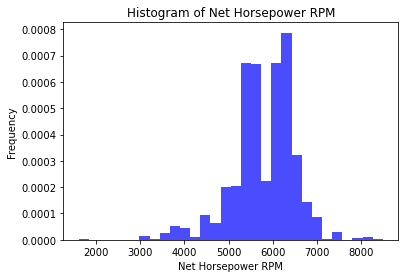

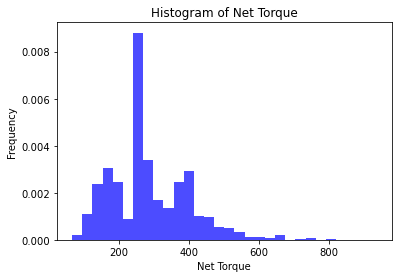

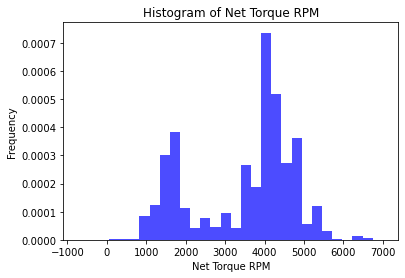

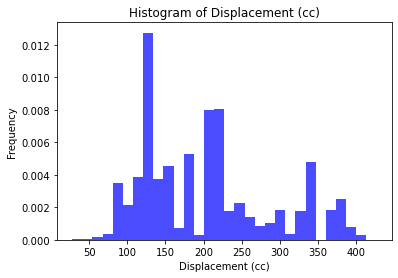

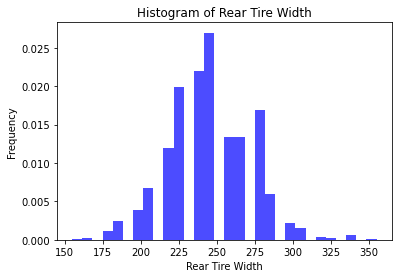

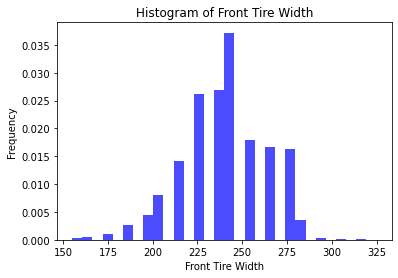

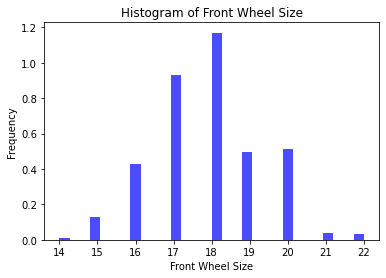

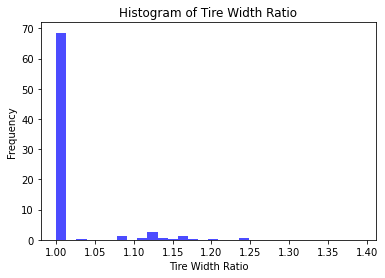

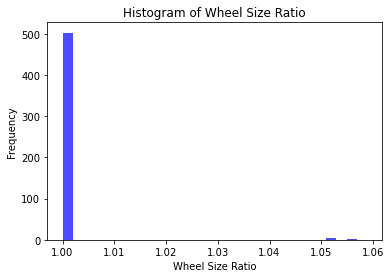

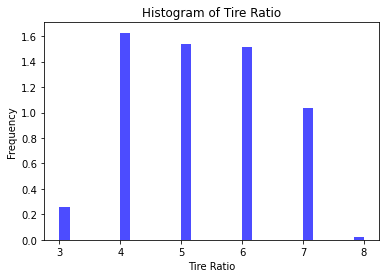

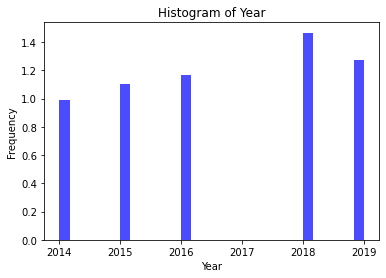

In [12]:
for col in dropped_car_data.select_dtypes(include=['float', 'int']).columns:
    plt.figure()
    plt.hist(car_data[col], bins=30, density=True, alpha=0.7, color='blue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + col)
    plt.show()

In [13]:
import warnings
warnings.filterwarnings('ignore')

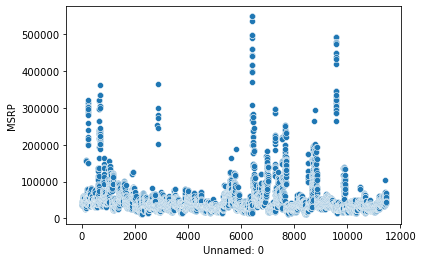

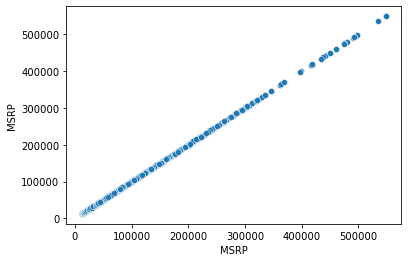

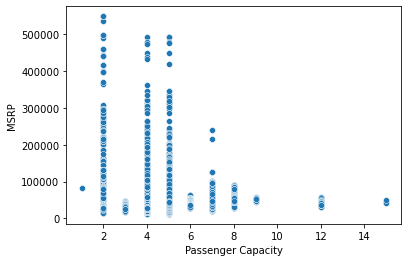

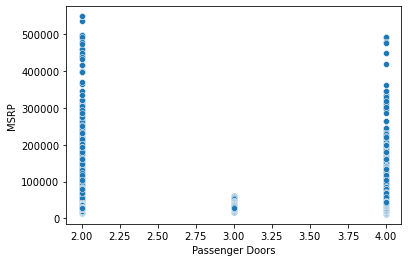

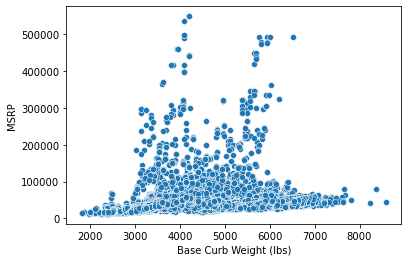

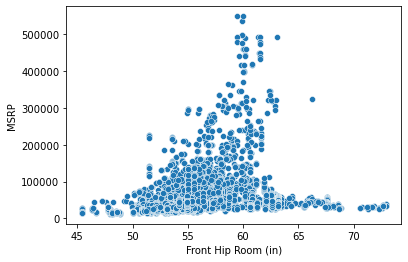

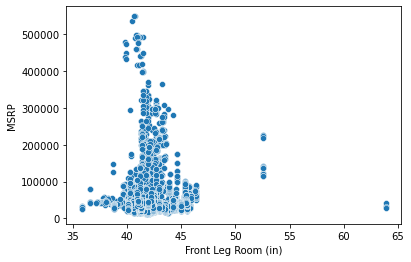

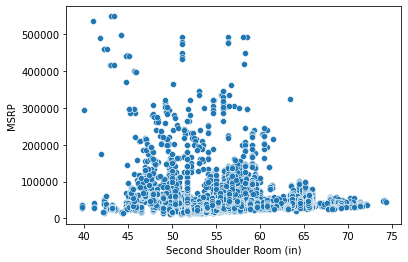

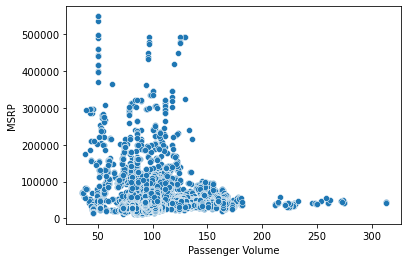

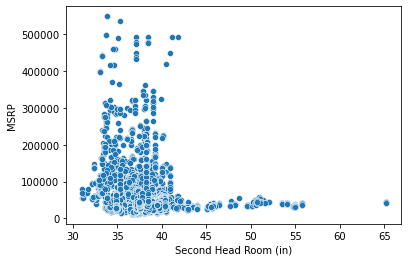

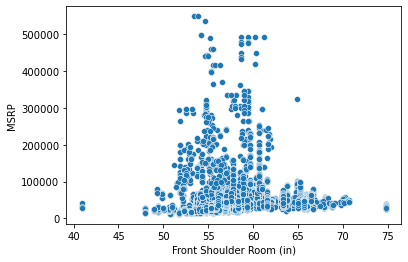

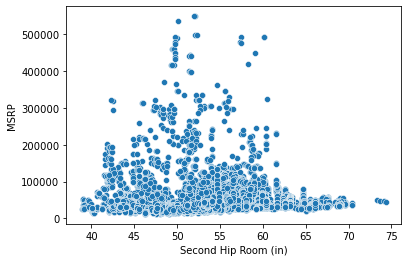

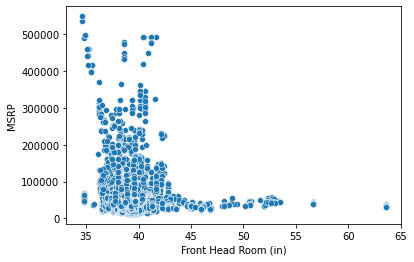

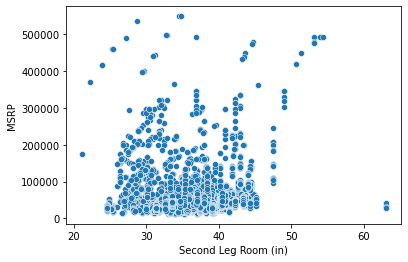

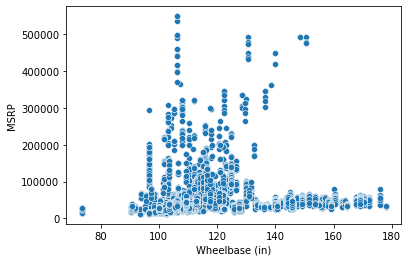

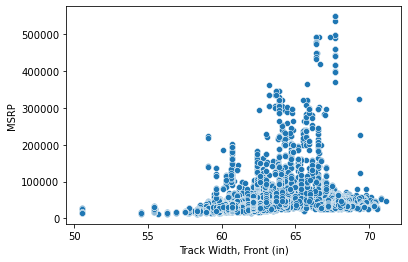

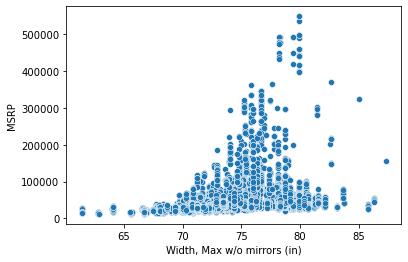

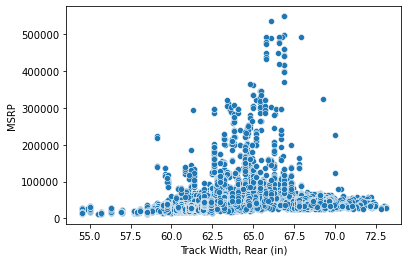

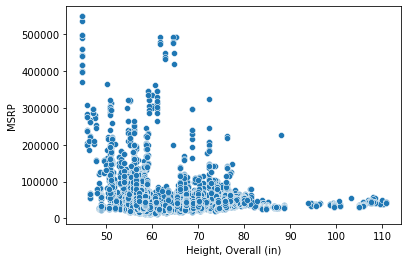

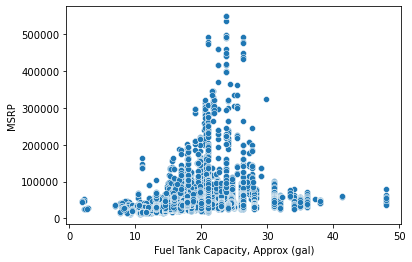

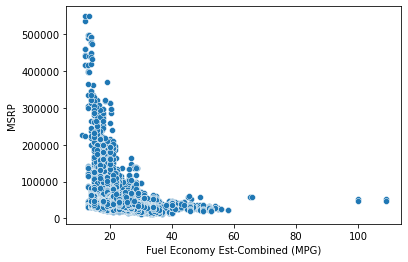

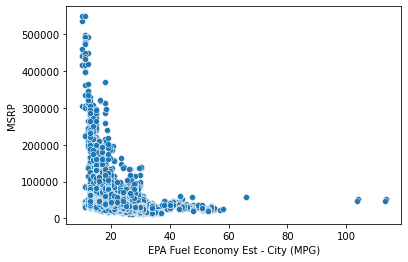

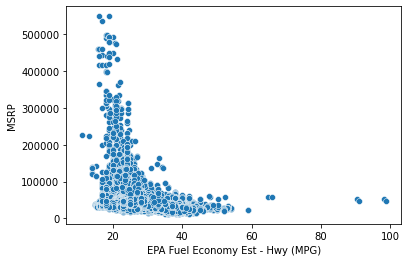

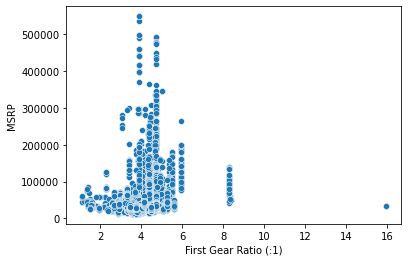

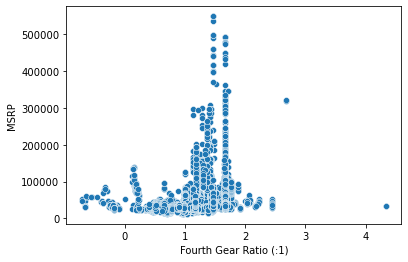

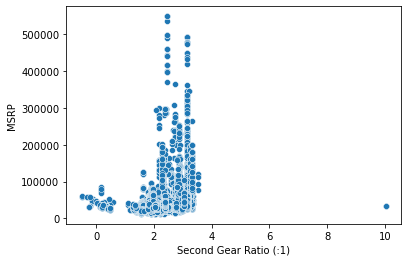

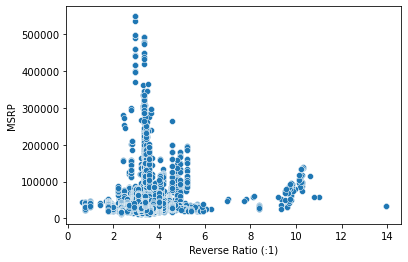

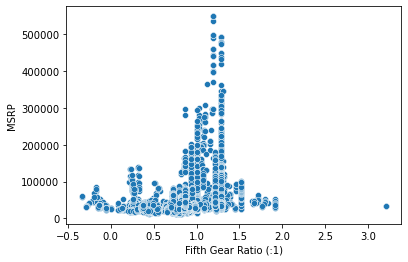

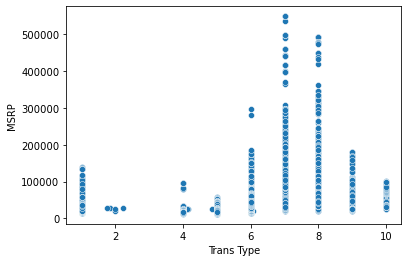

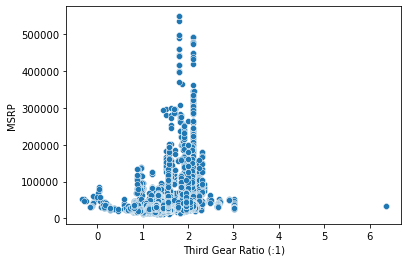

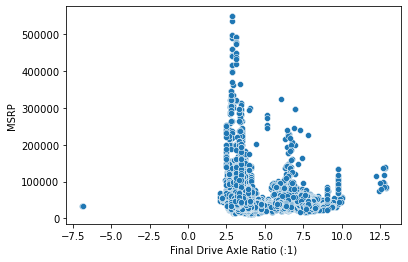

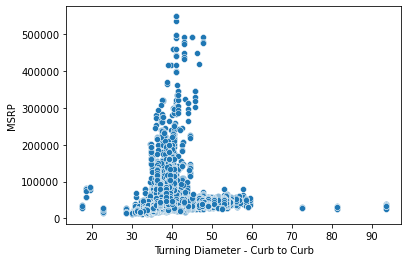

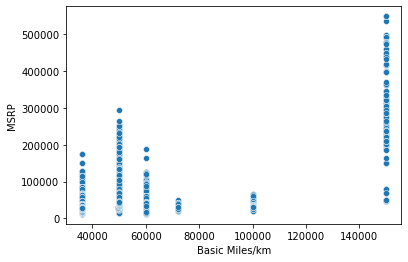

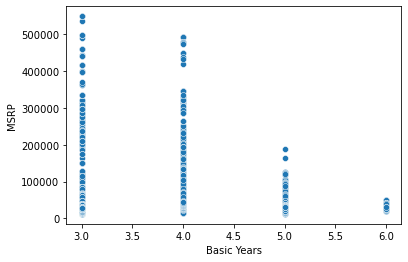

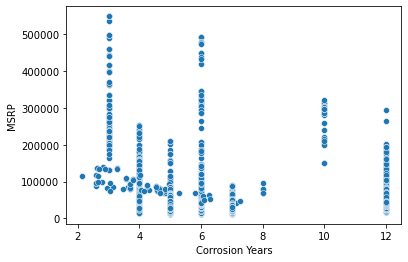

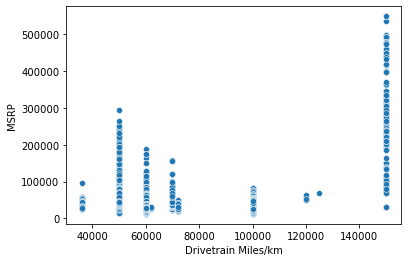

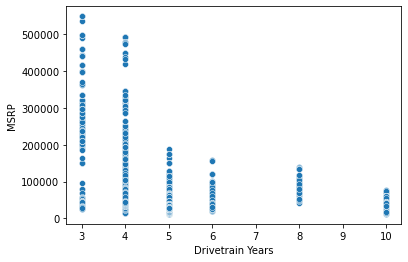

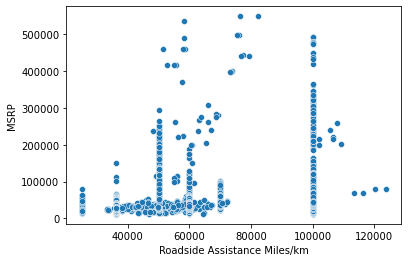

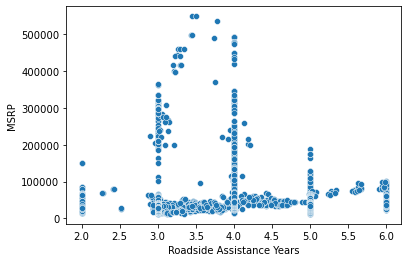

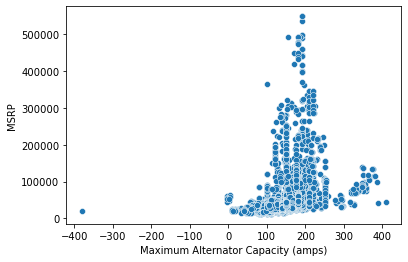

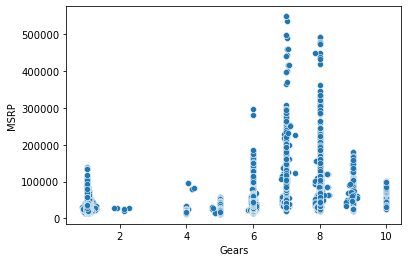

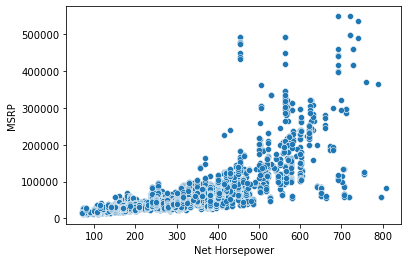

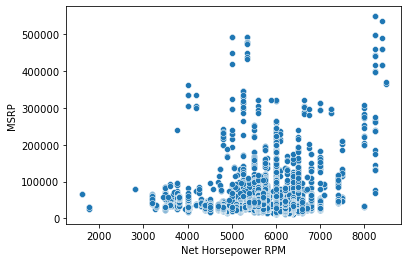

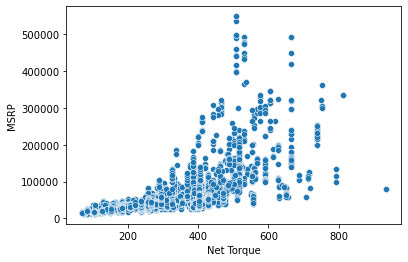

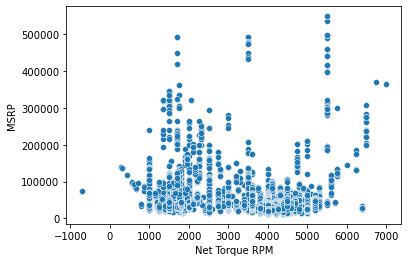

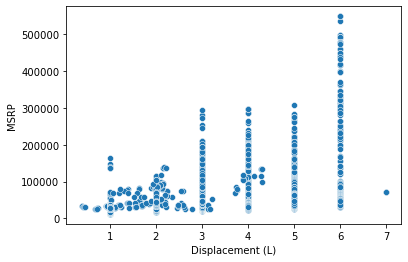

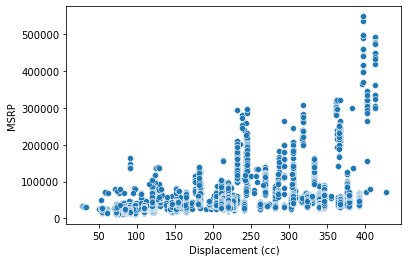

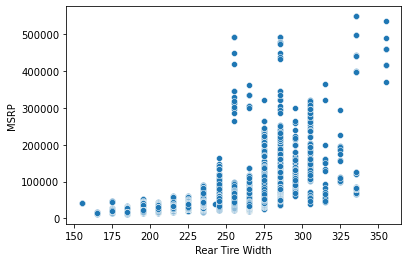

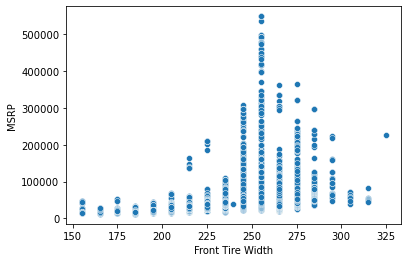

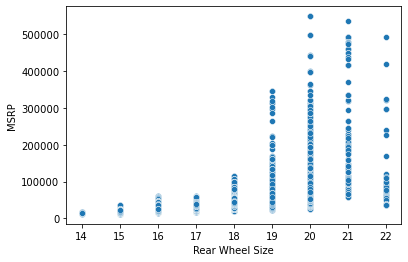

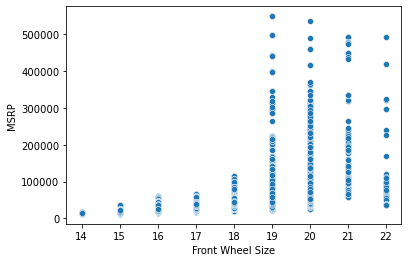

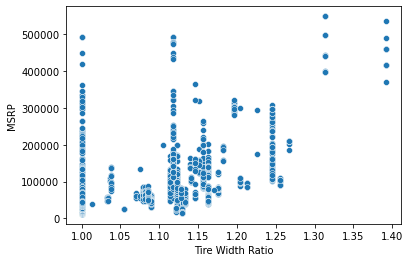

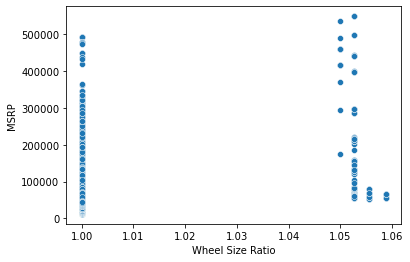

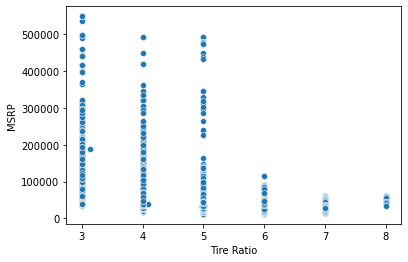

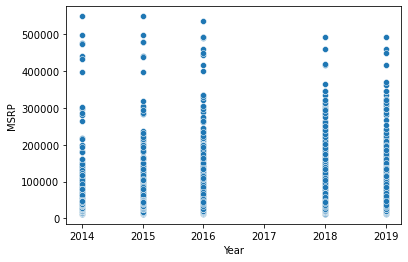

In [14]:
numerical_columns =car_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:  
    sns.scatterplot(x=col, y=car_data['MSRP'], data=car_data)
    plt.show()

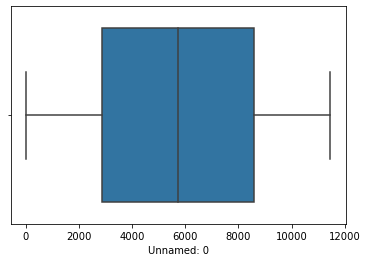

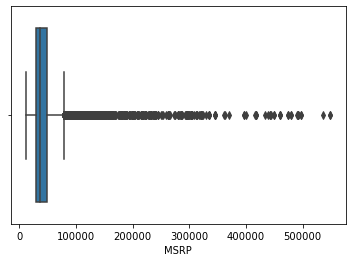

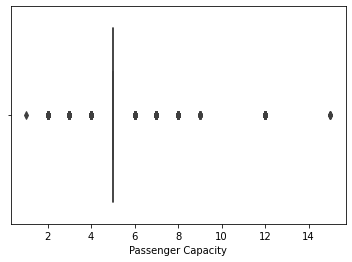

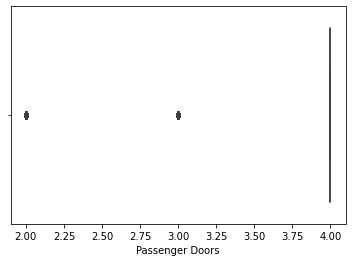

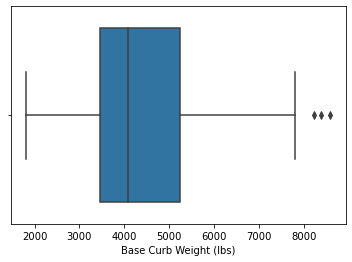

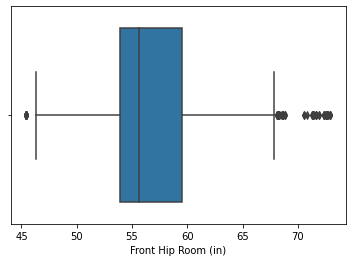

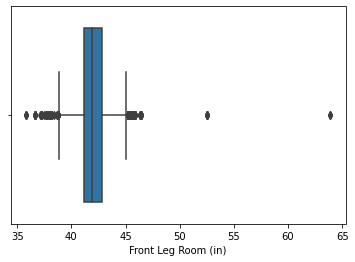

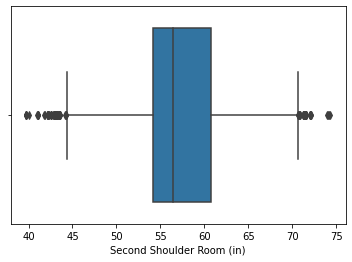

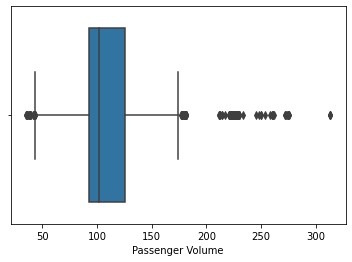

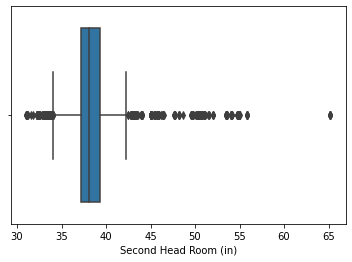

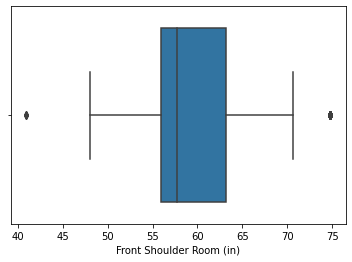

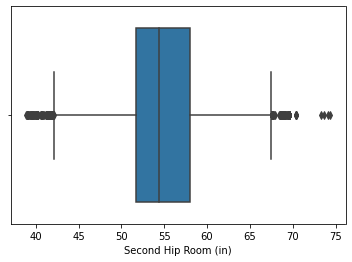

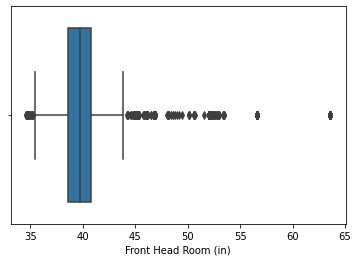

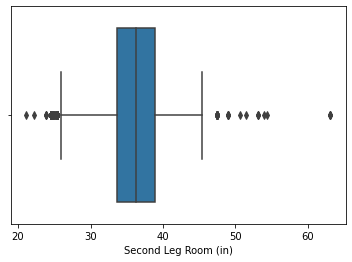

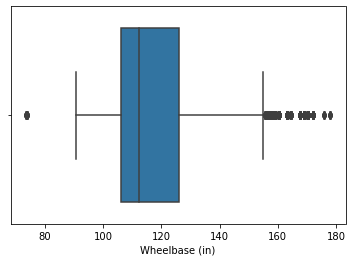

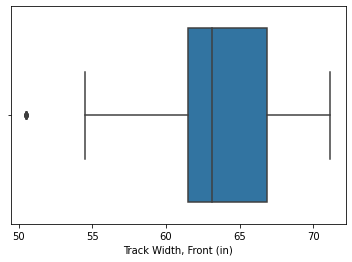

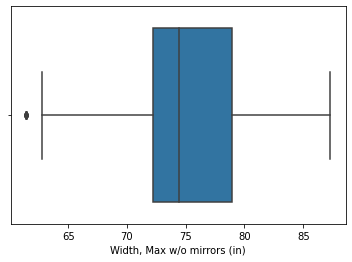

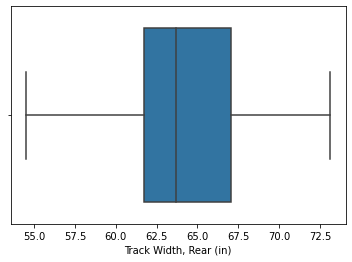

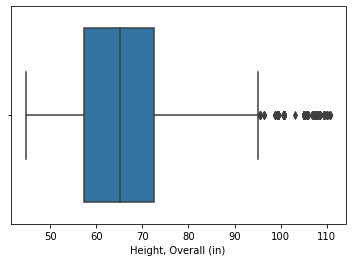

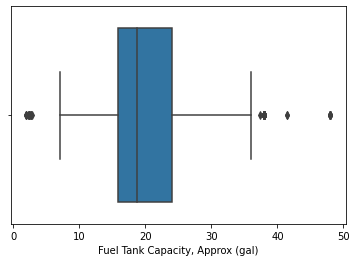

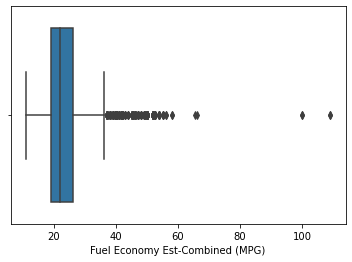

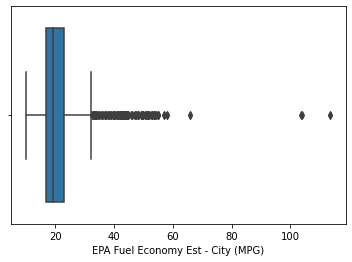

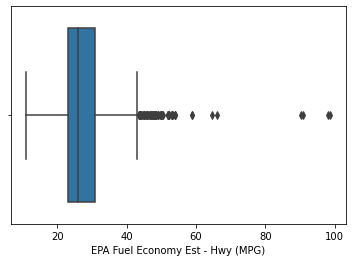

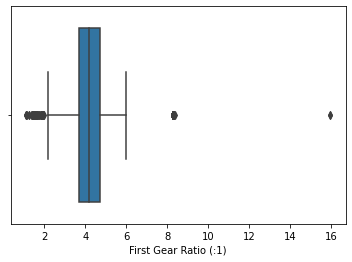

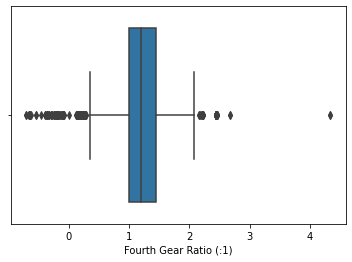

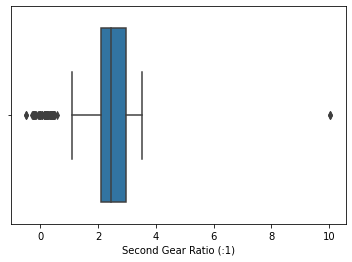

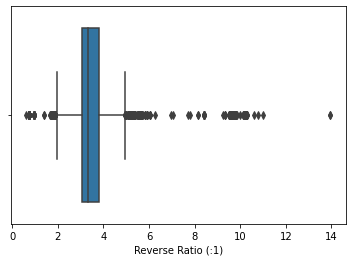

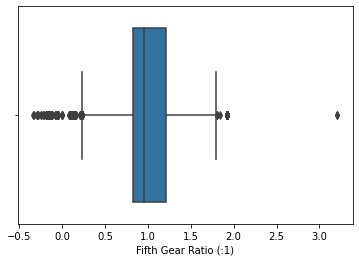

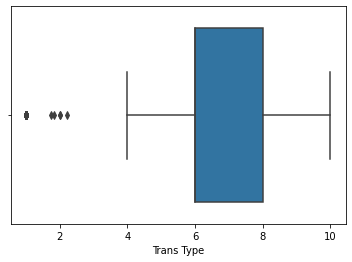

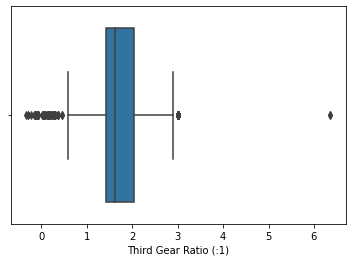

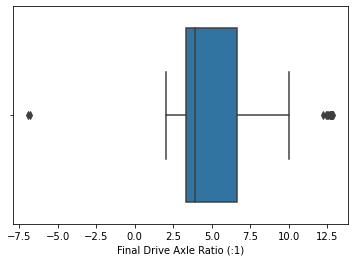

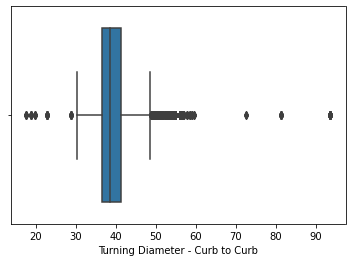

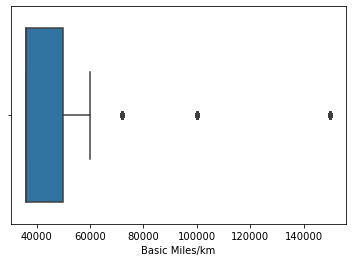

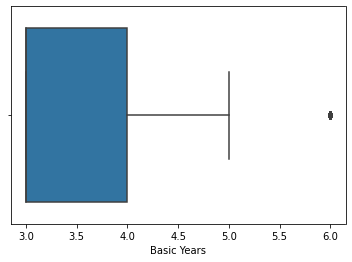

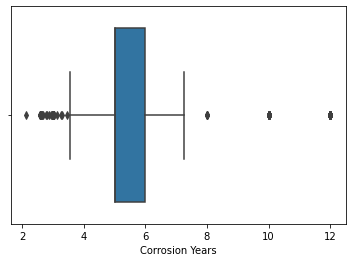

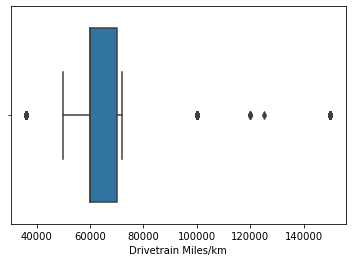

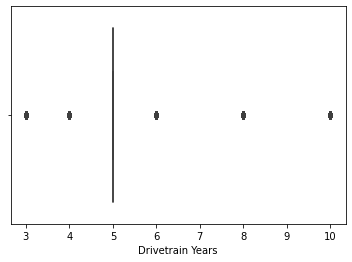

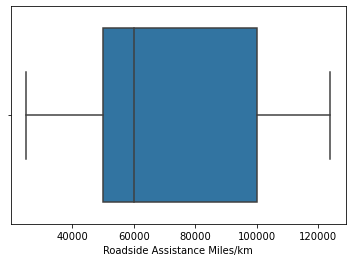

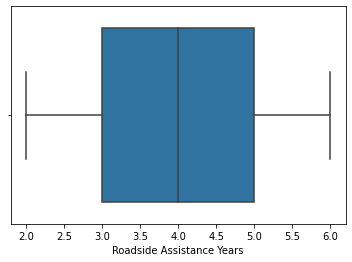

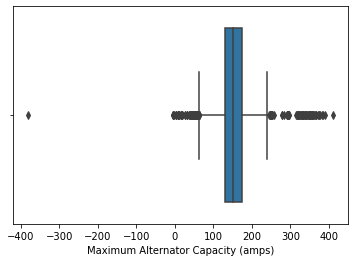

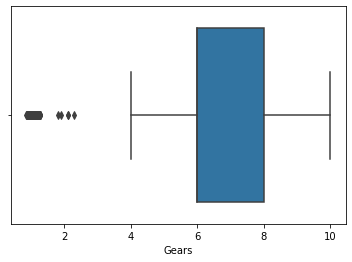

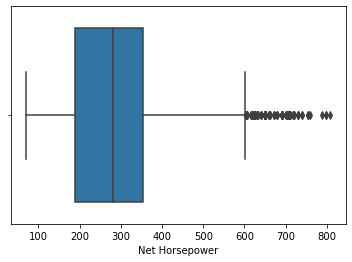

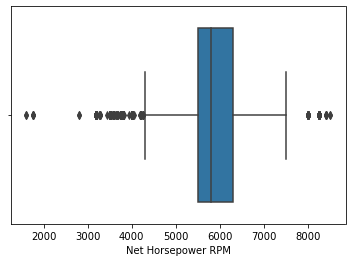

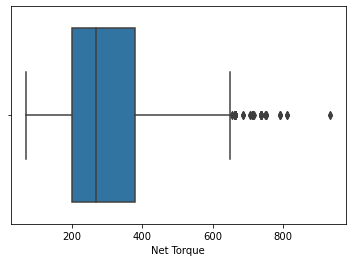

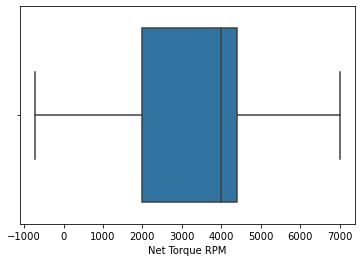

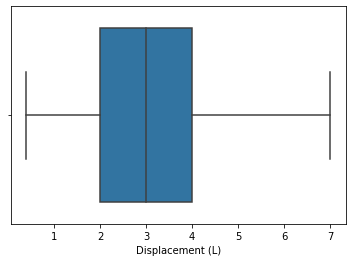

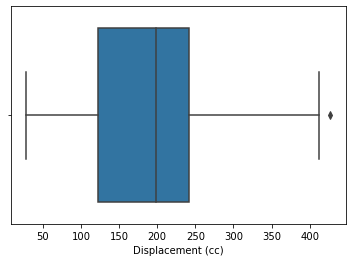

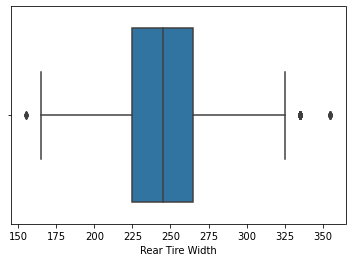

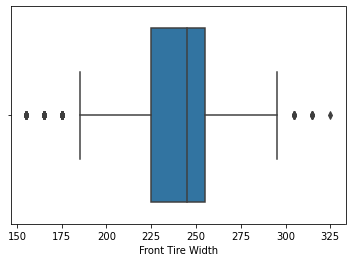

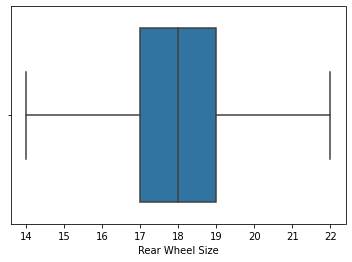

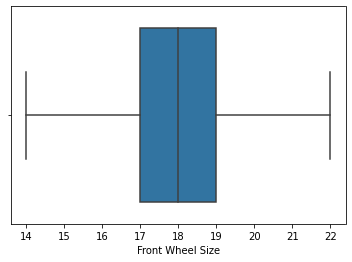

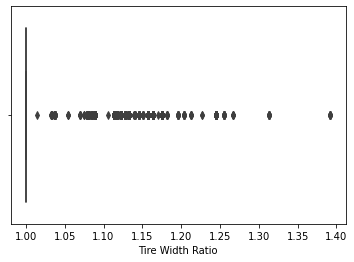

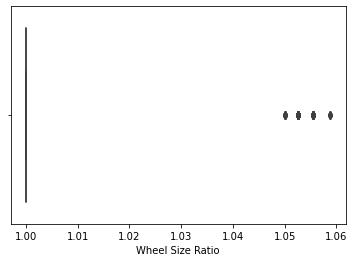

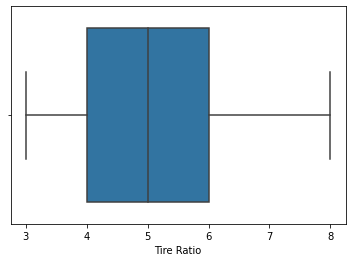

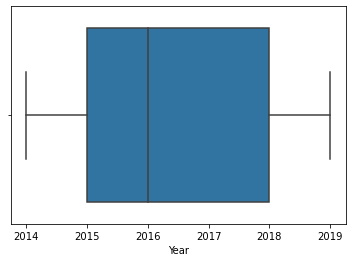

In [15]:
for col in numerical_columns:  
    sns.boxplot(car_data[col])
    plt.show()

In [16]:
# df['Front Hip Room','Front Leg Room','Passenger Volume','Second Hip Room (in)','Wheelbase (in)','Fuel Economy Est-Combined (MPG)','Trans Type','Basic Miles/km','Final Drive Axle Ratio (:1)','Reverse Ratio (:1)','Fifth Gear Ratio (:1)','Second Gear Ratio (:1)','Fourth Gear Ratio (:1)','First Gear Ratio (:1)','']


In [17]:
# def find_outliers_limit(df,col):
#     print(col)
#     print('-'*50)
#     #removing outliers
#     q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
#     iqr = q75 - q25
#     print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
#     # calculate the outlier cutoff
#     cut_off = iqr * 1.5
#     lower, upper = q25 - cut_off, q75 + cut_off
#     print('Lower:',lower,' Upper:',upper)
#     return lower,upper
# def remove_outlier(df,col,upper,lower):
#     # identify outliers
#     outliers = [x for x in df[col] if x > upper]
#     print('Identified outliers: %d' % len(outliers))
#     # remove outliers
#     outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
#     print('Non-outlier observations: %d' % len(outliers_removed))
#     final= np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
#     return final
# outlier_cols= dropped_car_data.select_dtypes(include=['float', 'int']).columns
# for col in outlier_cols:
#     lower,upper=find_outliers_limit(dropped_car_data,col)
#     dropped_car_data[col]=remove_outlier(dropped_car_data,col,upper,lower)

In [18]:
dropped_car_data

,Unnamed: 0,Car_Make_Model_Style,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),...,Engine Configuration,Engine Class,Displacement (cc),Rear Tire Width,Front Tire Width,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,0.0,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,FWD w/Technology Pkg,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3790.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
1,1.0,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,FWD w/Advance Pkg,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3829.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
2,2.0,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,FWD w/A-Spec Pkg,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3821.0,...,I,Turbocharged,122.0,255.0,255.0,20.0,1.0,1.0,4.0,2019.0
3,3.0,2019 Acura RDX Specs: FWD,37400.0,FWD,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3783.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
4,4.0,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,AWD w/Technology Pkg,All Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 4WD,4026.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11452,11452.0,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,T5 AWD Platinum,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3920.0,...,I,Intercooled,120.0,235.0,235.0,18.0,1.0,1.0,5.0,2018.0
11453,11453.0,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,4dr Wgn T5 AWD,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3602.0,...,I,Intercooled,154.0,235.0,235.0,18.0,1.0,1.0,5.0,2016.0
11454,11454.0,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,4dr Wgn T5 Platinum AWD,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3602.0,...,I,Intercooled,154.0,235.0,235.0,18.0,1.0,1.0,5.0,2016.0
11455,11455.0,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,2015.5 4dr Wgn T5 AWD,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3602.0,...,I,Intercooled,154.0,235.0,235.0,18.0,1.0,1.0,5.0,2015.0


### Binary Transformation for the Yes and No columns 

In [20]:
Yes_no_columns =[col for col in dropped_car_data.columns if dropped_car_data[col].isin(["Yes", "No"]).all()]


In [38]:
Yes_no_columns

['Air Bag-Passenger Switch (On/Off)',
 'Air Bag-Side Body-Front',
 'Air Bag-Side Body-Rear',
 'Air Bag-Side Head-Front',
 'Air Bag-Side Head-Rear',
 'Brakes-ABS',
 'Child Safety Rear Door Locks',
 'Daytime Running Lights',
 'Traction Control',
 'Night Vision',
 'Rollover Protection Bars',
 'Fog Lamps',
 'Parking Aid',
 'Tire Pressure Monitor',
 'Back-Up Camera',
 'Stability Control']

In [39]:
for col in Yes_no_columns:
    dropped_car_data[col] = dropped_car_data[col].replace({"Yes": 1, "No": 0})

In [43]:
for col in Yes_no_columns:  # loop through all columns except target
    zero_val = dropped_car_data[dropped_car_data[col] == 0]['MSRP']
    one_val = dropped_car_data[dropped_car_data[col] == 1]['MSRP']
    t_stat, p_val = stats.ttest_ind(zero_val, one_val, equal_var=False, nan_policy='omit')
    print(f"T-test result for column '{col}': t-statistic={t_stat:.2f}, p-value={p_val:.4f}")

T-test result for column 'Air Bag-Passenger Switch (On/Off)': t-statistic=nan, p-value=nan
T-test result for column 'Air Bag-Side Body-Front': t-statistic=nan, p-value=nan
T-test result for column 'Air Bag-Side Body-Rear': t-statistic=nan, p-value=nan
T-test result for column 'Air Bag-Side Head-Front': t-statistic=nan, p-value=nan
T-test result for column 'Air Bag-Side Head-Rear': t-statistic=nan, p-value=nan
T-test result for column 'Brakes-ABS': t-statistic=nan, p-value=nan
T-test result for column 'Child Safety Rear Door Locks': t-statistic=nan, p-value=nan
T-test result for column 'Daytime Running Lights': t-statistic=nan, p-value=nan
T-test result for column 'Traction Control': t-statistic=nan, p-value=nan
T-test result for column 'Night Vision': t-statistic=nan, p-value=nan
T-test result for column 'Rollover Protection Bars': t-statistic=nan, p-value=nan
T-test result for column 'Fog Lamps': t-statistic=nan, p-value=nan
T-test result for column 'Parking Aid': t-statistic=nan, p-v

In [22]:
dropped_car_data

,Unnamed: 0,Car_Make_Model_Style,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),...,Engine Configuration,Engine Class,Displacement (cc),Rear Tire Width,Front Tire Width,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,0.0,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,FWD w/Technology Pkg,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3790.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
1,1.0,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,FWD w/Advance Pkg,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3829.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
2,2.0,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,FWD w/A-Spec Pkg,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3821.0,...,I,Turbocharged,122.0,255.0,255.0,20.0,1.0,1.0,4.0,2019.0
3,3.0,2019 Acura RDX Specs: FWD,37400.0,FWD,Front Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 2WD,3783.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
4,4.0,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,AWD w/Technology Pkg,All Wheel Drive,5.0,4.0,Sport Utility,Small Sport Utility Vehicles 4WD,4026.0,...,I,Turbocharged,122.0,235.0,235.0,19.0,1.0,1.0,5.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11452,11452.0,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,T5 AWD Platinum,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3920.0,...,I,Intercooled,120.0,235.0,235.0,18.0,1.0,1.0,5.0,2018.0
11453,11453.0,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,4dr Wgn T5 AWD,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3602.0,...,I,Intercooled,154.0,235.0,235.0,18.0,1.0,1.0,5.0,2016.0
11454,11454.0,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,4dr Wgn T5 Platinum AWD,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3602.0,...,I,Intercooled,154.0,235.0,235.0,18.0,1.0,1.0,5.0,2016.0
11455,11455.0,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,2015.5 4dr Wgn T5 AWD,All Wheel Drive,5.0,4.0,4dr Car,Mid-Size Station Wagon,3602.0,...,I,Intercooled,154.0,235.0,235.0,18.0,1.0,1.0,5.0,2015.0


### To test if the columns are Normally Distributed

In [23]:
for col in dropped_car_data.columns:
    # Check if the column is numeric
    if dropped_car_data[col].dtype in ['float64', 'int64']:
        
        # Perform the Shapiro-Wilk test on the column
        stat, p = shapiro(dropped_car_data[col])
        alpha = 0.05
        if p > alpha:
            print(f'{col} is normally distributed (p={p:.3f})')
        else:
            print(f'{col} is not normally distributed (p={p:.3f})')

Unnamed: 0 is not normally distributed (p=0.000)
MSRP is not normally distributed (p=0.000)
Passenger Capacity is not normally distributed (p=0.000)
Passenger Doors is not normally distributed (p=0.000)
Base Curb Weight (lbs) is not normally distributed (p=0.000)
Front Hip Room (in) is not normally distributed (p=0.000)
Front Leg Room (in) is not normally distributed (p=0.000)
Second Shoulder Room (in) is not normally distributed (p=0.000)
Passenger Volume is not normally distributed (p=0.000)
Second Head Room (in) is not normally distributed (p=0.000)
Front Shoulder Room (in) is not normally distributed (p=0.000)
Second Hip Room (in) is not normally distributed (p=0.000)
Front Head Room (in) is not normally distributed (p=0.000)
Second Leg Room (in) is not normally distributed (p=0.000)
Wheelbase (in) is not normally distributed (p=0.000)
Track Width, Front (in) is not normally distributed (p=0.000)
Width, Max w/o mirrors (in) is not normally distributed (p=0.000)
Track Width, Rear (i

In [24]:
new_num_cols = dropped_car_data.select_dtypes(include=['float64', 'int64']).columns # select only numerical columns
dropped_car_data[new_num_cols] = np.log1p(dropped_car_data[new_num_cols]) # apply logarithmic transformation


In [25]:
import scipy.stats as stats

In [26]:
x_data = dropped_car_data.drop("MSRP",1)

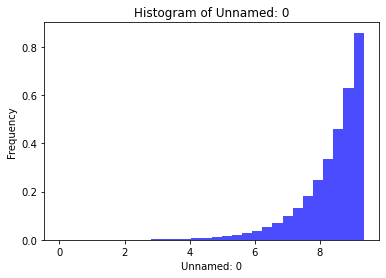

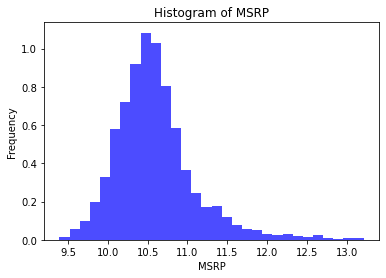

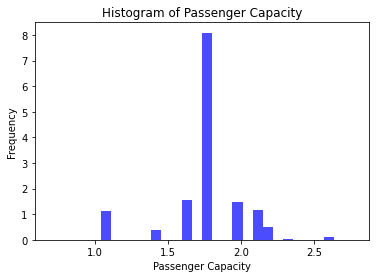

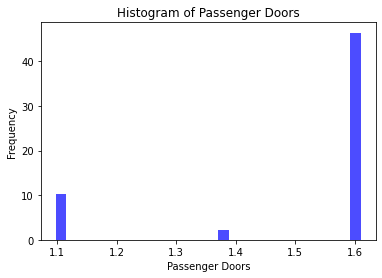

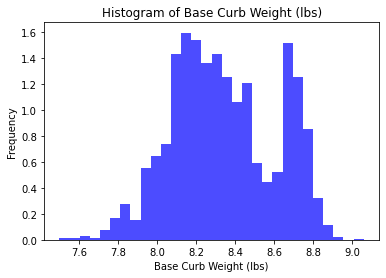

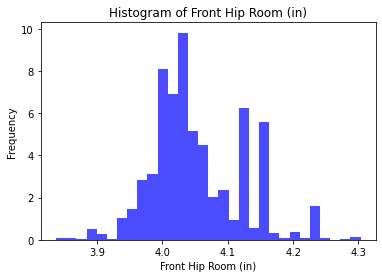

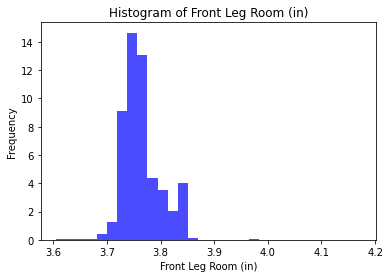

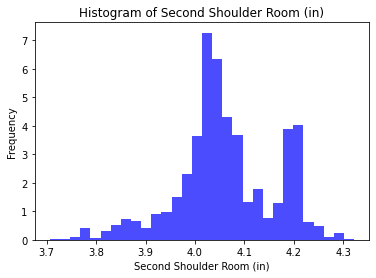

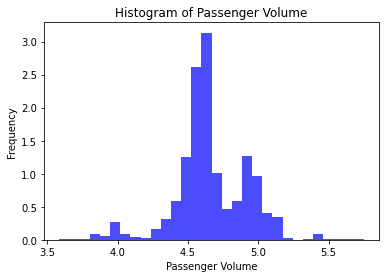

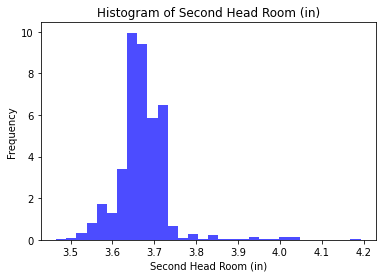

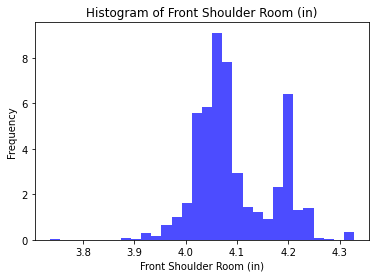

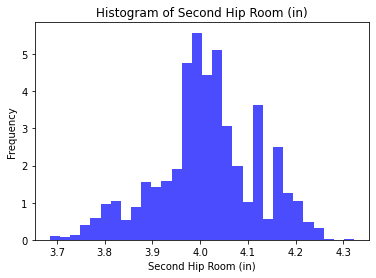

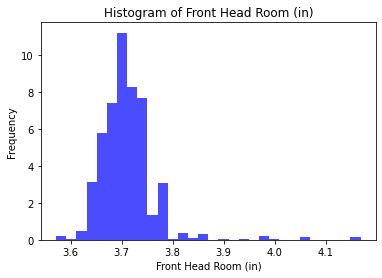

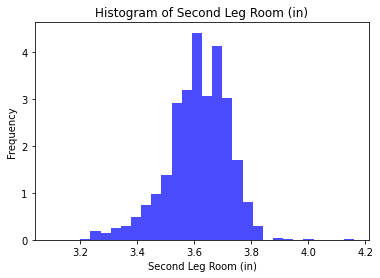

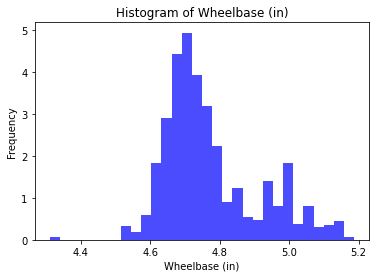

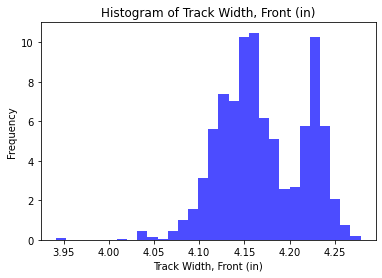

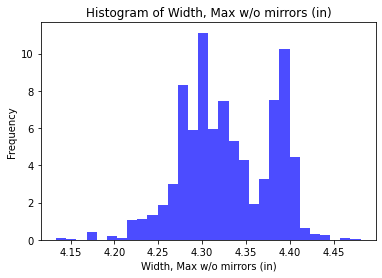

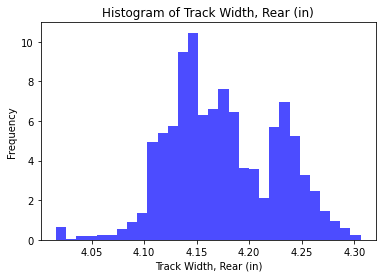

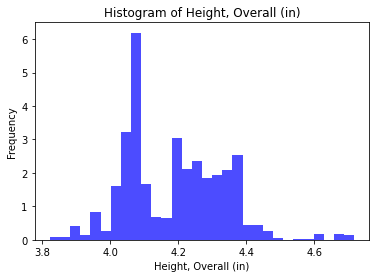

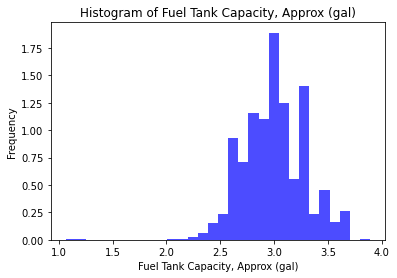

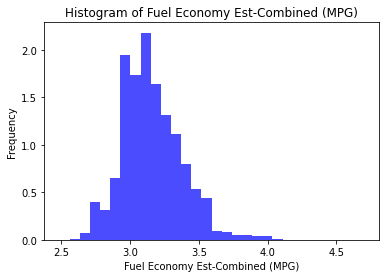

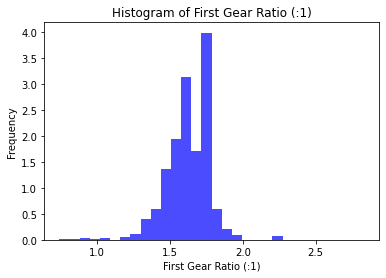

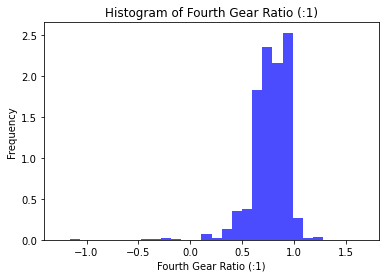

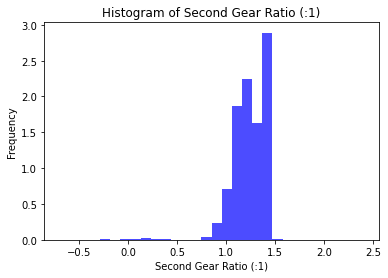

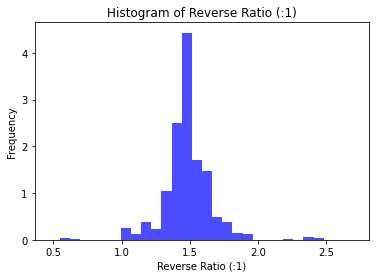

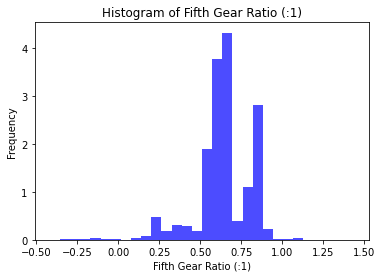

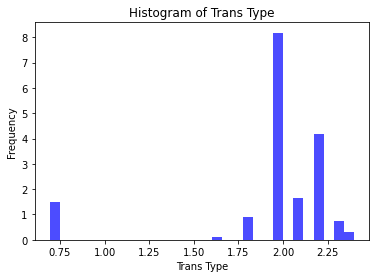

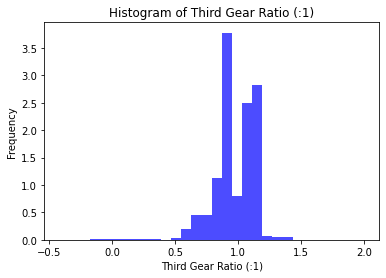

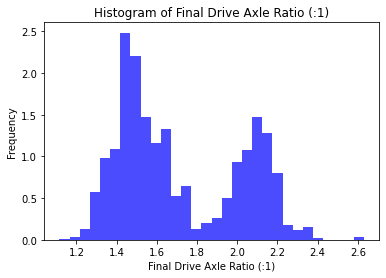

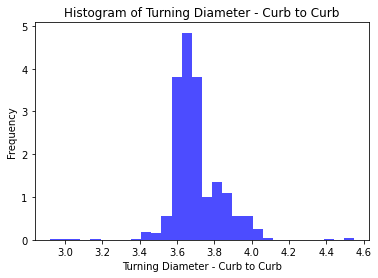

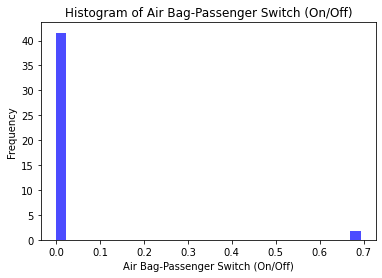

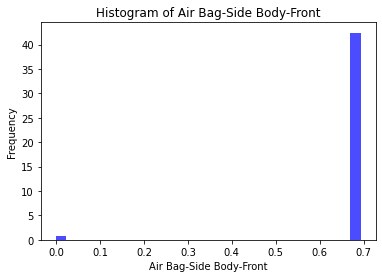

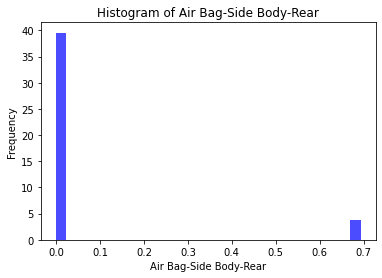

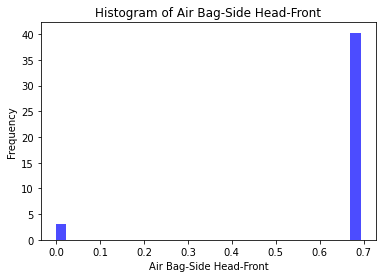

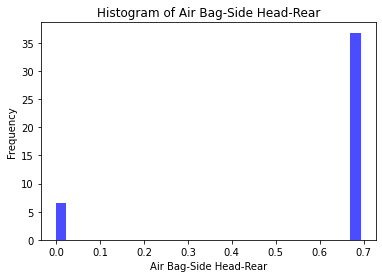

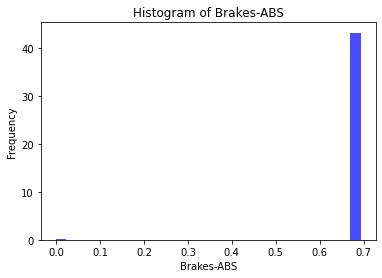

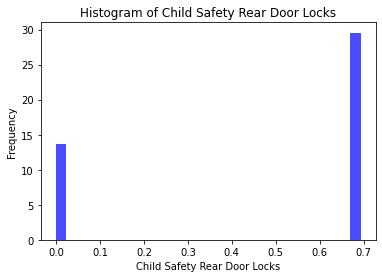

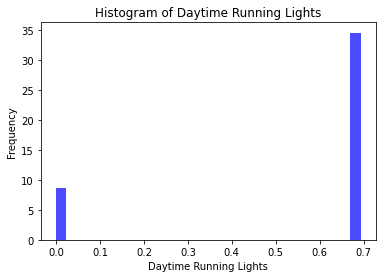

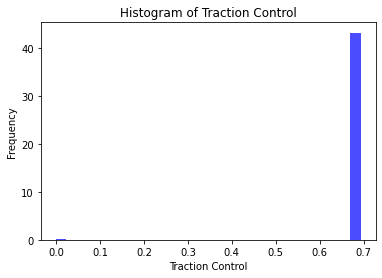

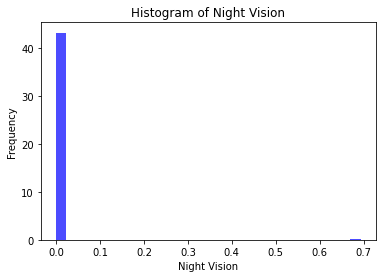

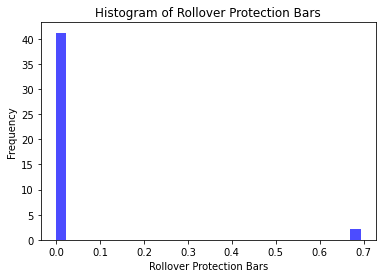

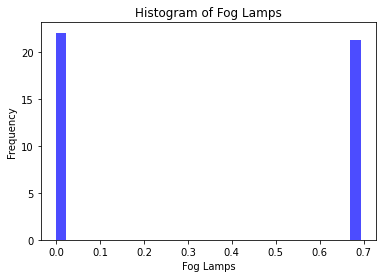

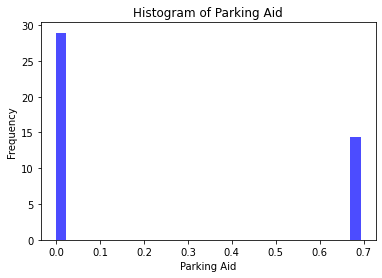

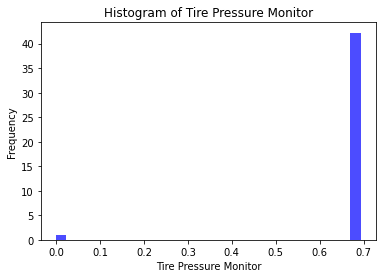

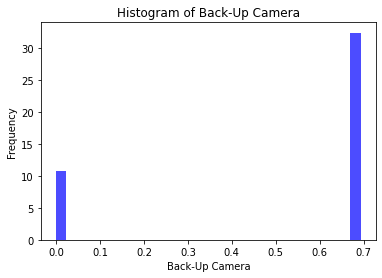

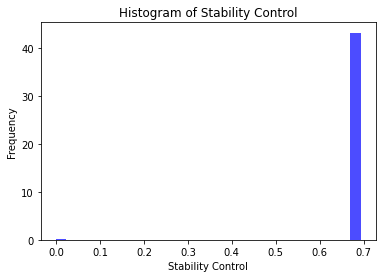

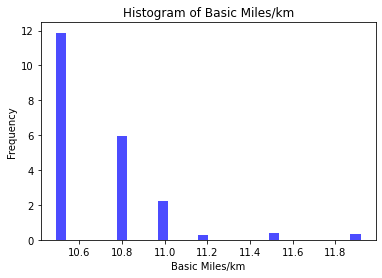

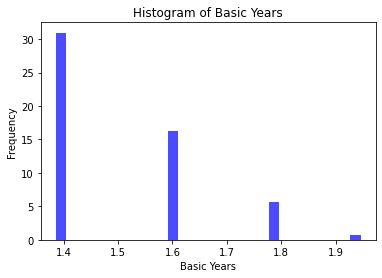

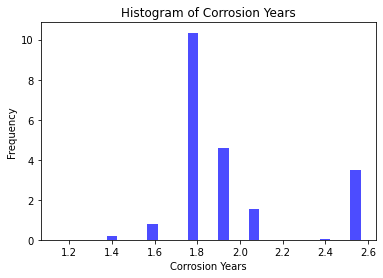

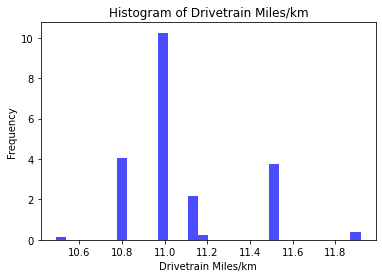

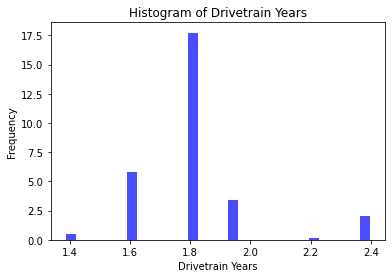

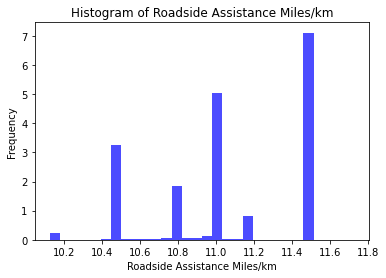

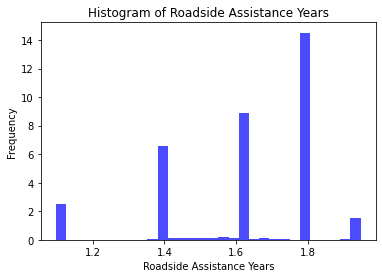

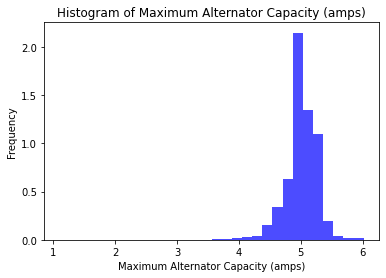

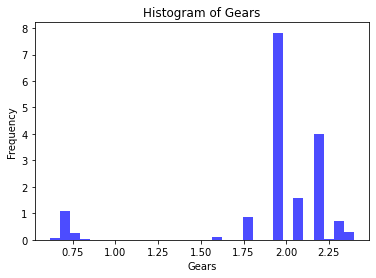

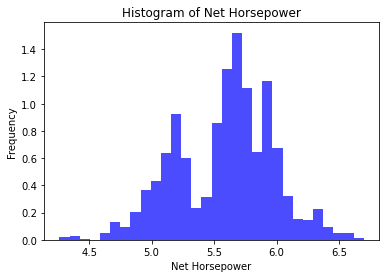

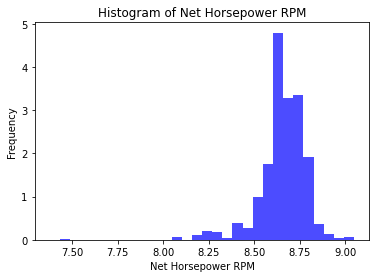

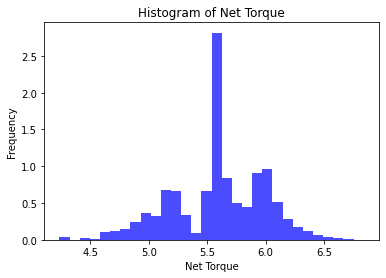

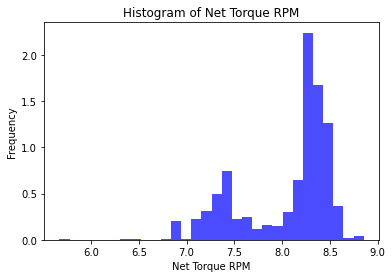

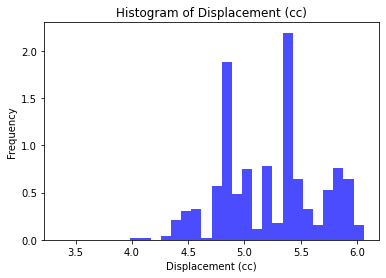

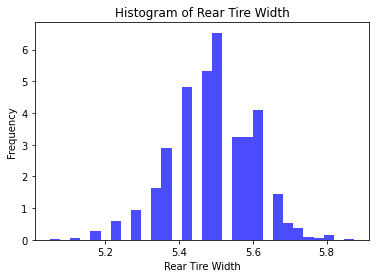

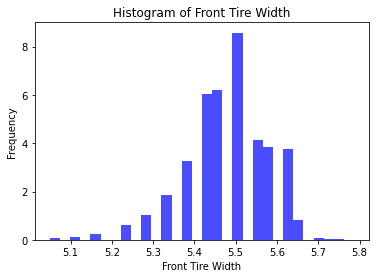

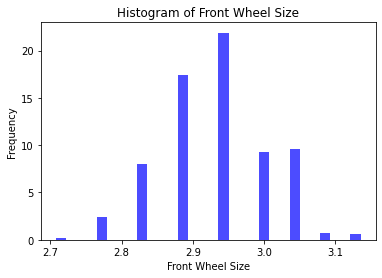

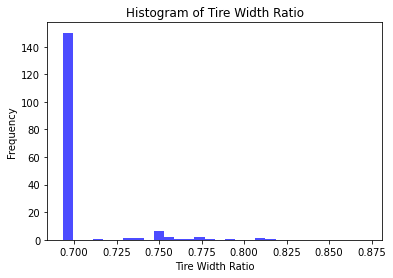

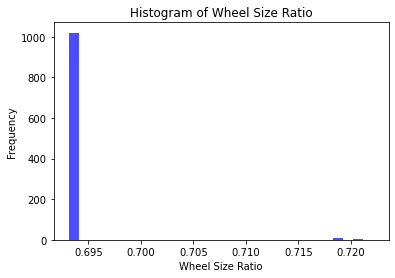

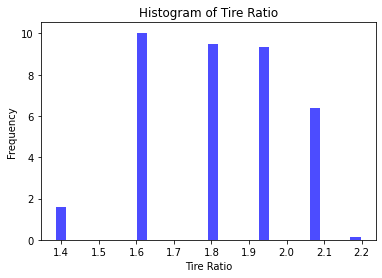

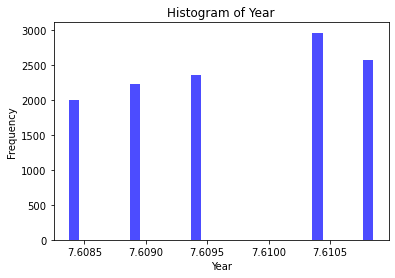

In [27]:
for col in dropped_car_data.select_dtypes(include=['float', 'int']).columns:
    plt.figure()
    plt.hist(dropped_car_data[col], bins=30, density=True, alpha=0.7, color='blue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + col)
    plt.show()

In [28]:
from scipy.stats.mstats import winsorize

In [29]:
for col in x_data.select_dtypes(include=['float64', 'int64']).columns:  
    lower_limit = np.percentile(x_data[col], 1)
    upper_limit = np.percentile(x_data[col], 9)
    x_data[col] = winsorize(x_data[col], limits=(0.05, 0.05))

# Check if the data is now more normally distributed
    shapiro_test = shapiro(x_data[col])
    print(shapiro_test)

ShapiroResult(statistic=0.871705174446106, pvalue=0.0)
ShapiroResult(statistic=0.7674062848091125, pvalue=0.0)
ShapiroResult(statistic=0.5053771734237671, pvalue=0.0)
ShapiroResult(statistic=0.9457178115844727, pvalue=0.0)
ShapiroResult(statistic=0.9245173931121826, pvalue=0.0)
ShapiroResult(statistic=0.9051027894020081, pvalue=0.0)
ShapiroResult(statistic=0.9439277648925781, pvalue=0.0)
ShapiroResult(statistic=0.9451826810836792, pvalue=0.0)
ShapiroResult(statistic=0.9507032632827759, pvalue=0.0)
ShapiroResult(statistic=0.8860783576965332, pvalue=0.0)
ShapiroResult(statistic=0.9679924845695496, pvalue=1.8216880036222622e-44)
ShapiroResult(statistic=0.963924765586853, pvalue=0.0)
ShapiroResult(statistic=0.9639772772789001, pvalue=0.0)
ShapiroResult(statistic=0.879639208316803, pvalue=0.0)
ShapiroResult(statistic=0.9333887696266174, pvalue=0.0)
ShapiroResult(statistic=0.9296233057975769, pvalue=0.0)
ShapiroResult(statistic=0.9397900104522705, pvalue=0.0)
ShapiroResult(statistic=0.920712

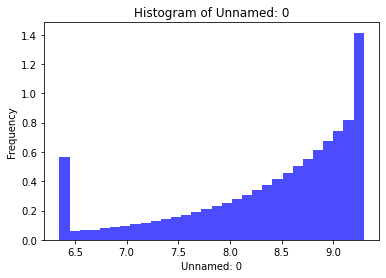

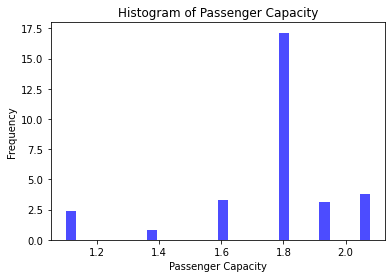

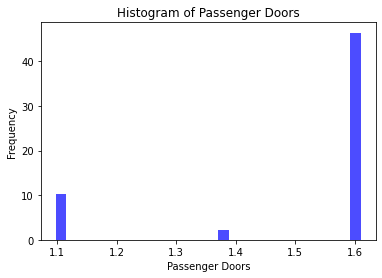

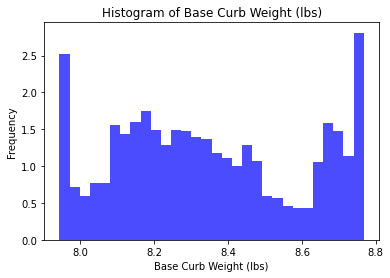

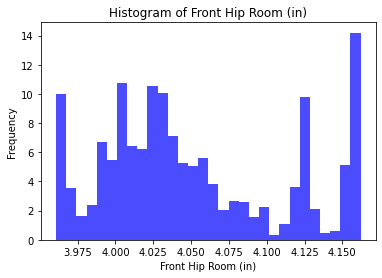

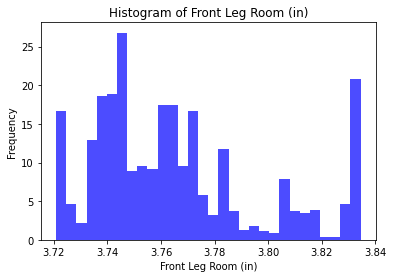

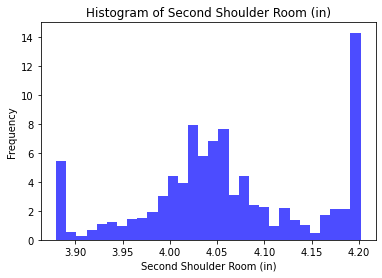

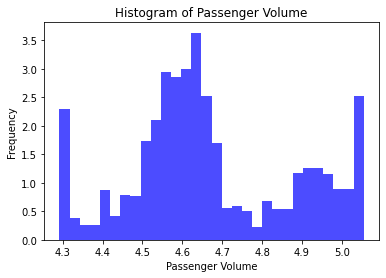

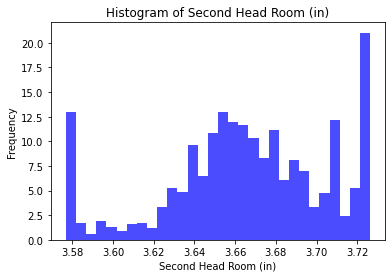

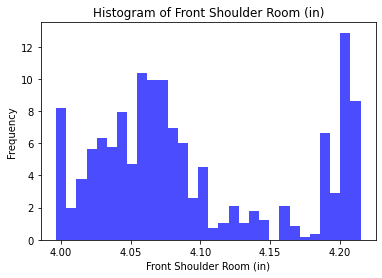

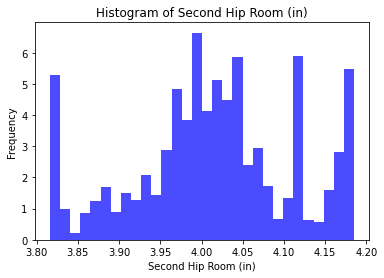

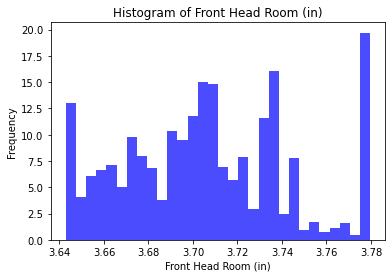

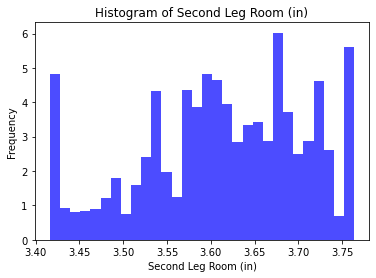

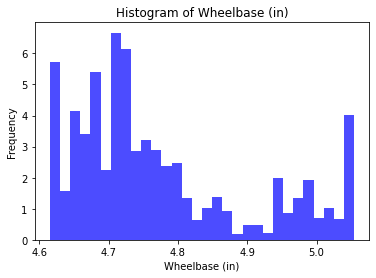

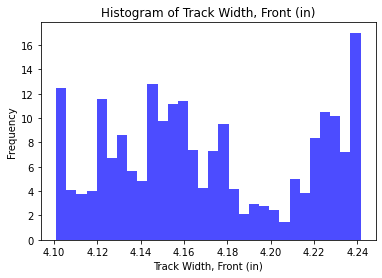

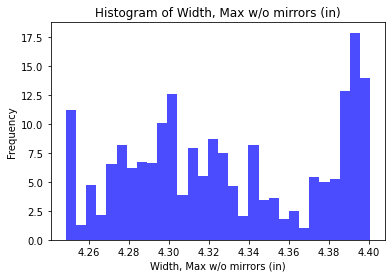

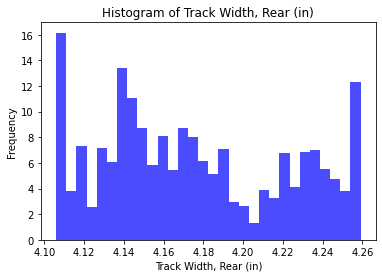

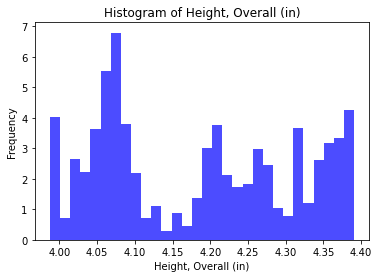

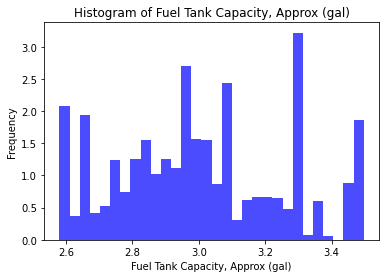

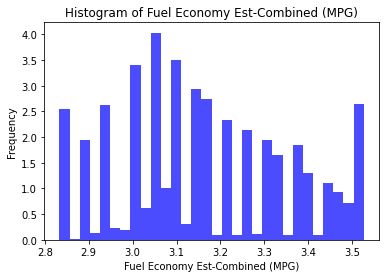

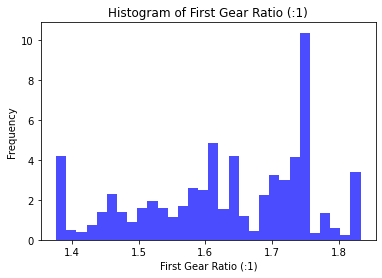

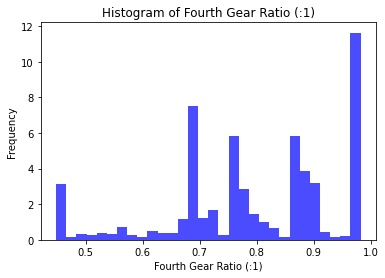

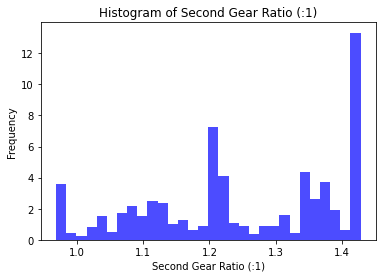

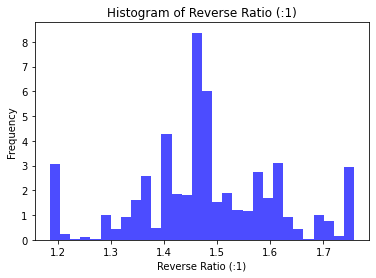

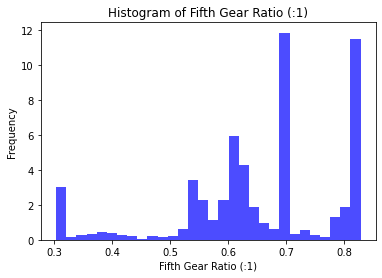

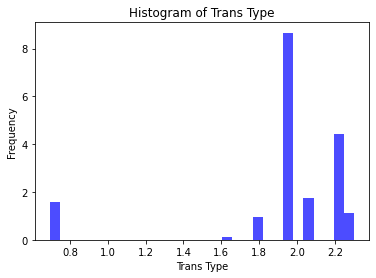

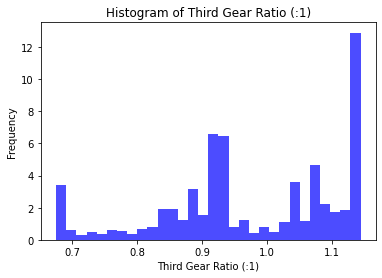

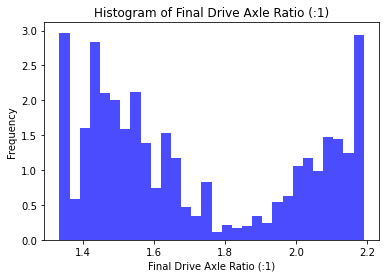

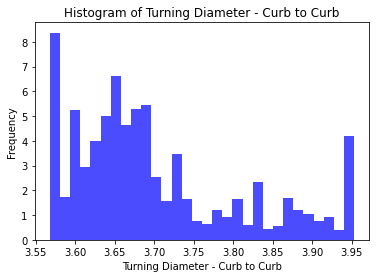

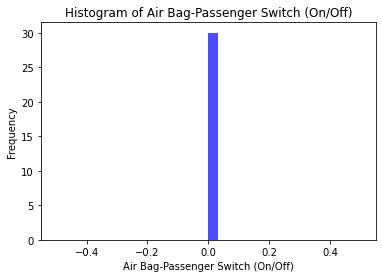

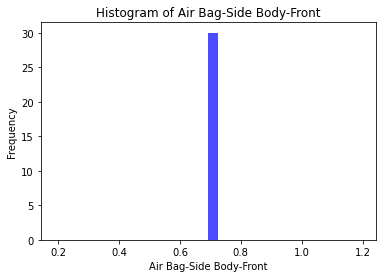

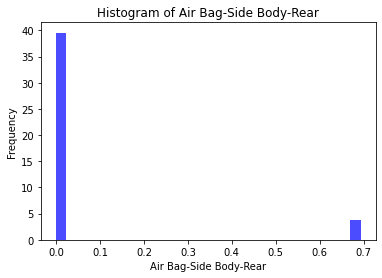

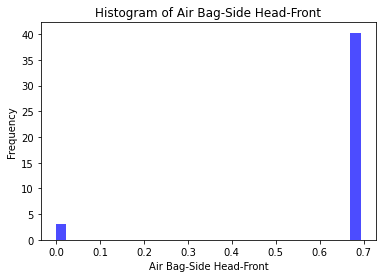

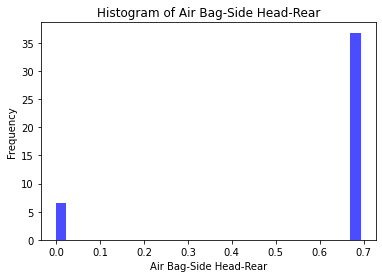

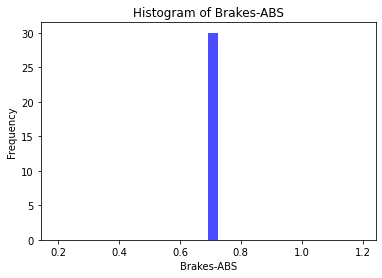

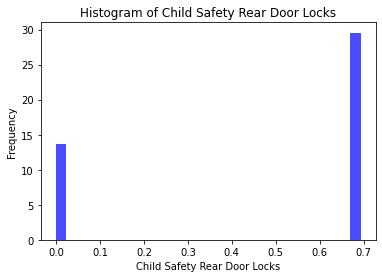

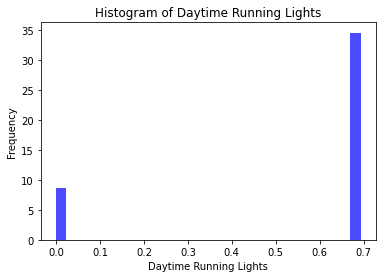

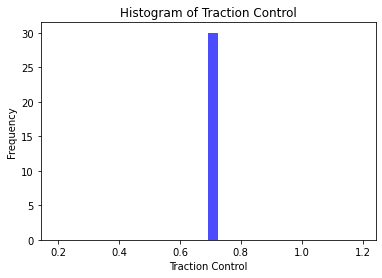

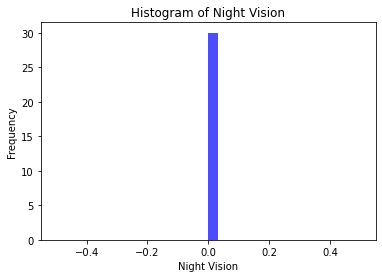

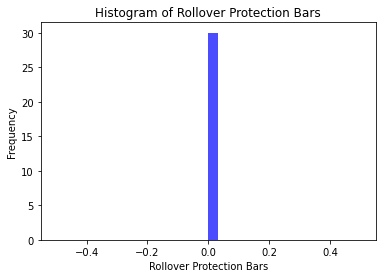

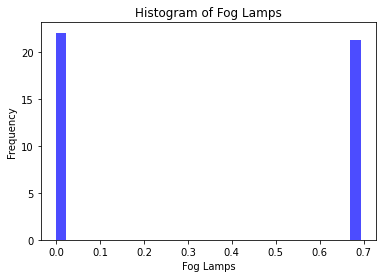

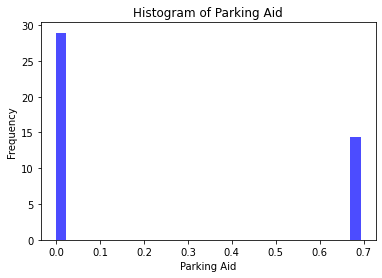

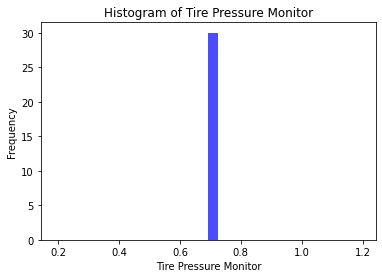

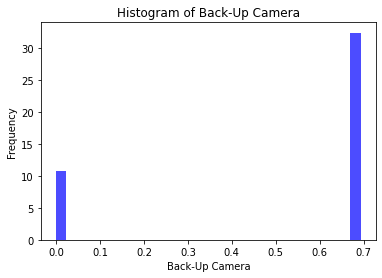

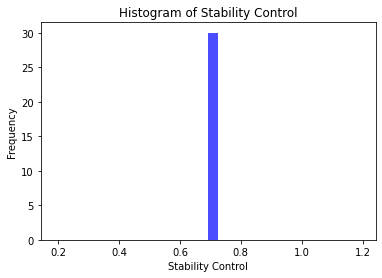

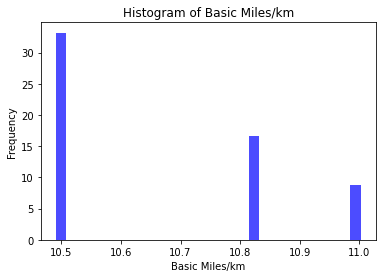

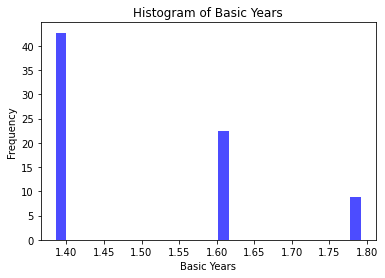

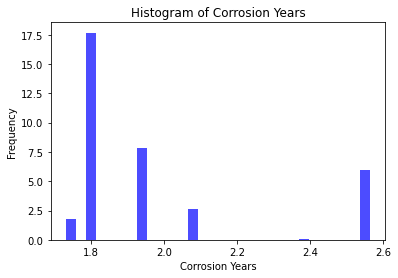

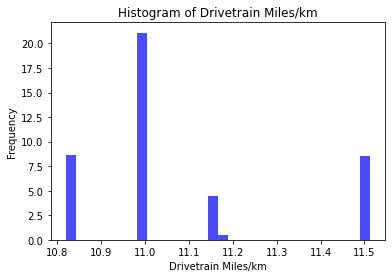

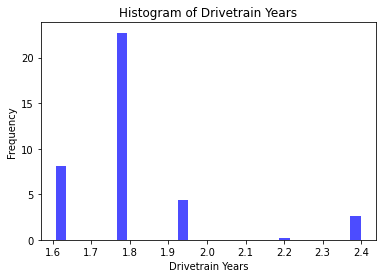

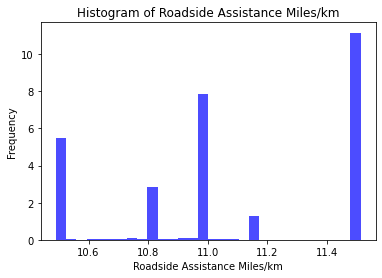

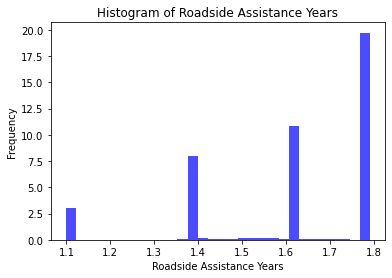

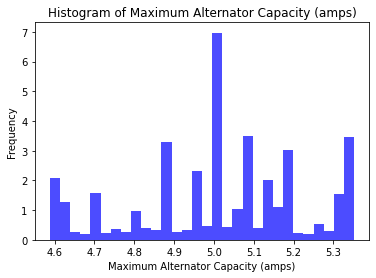

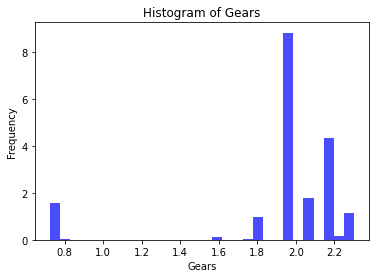

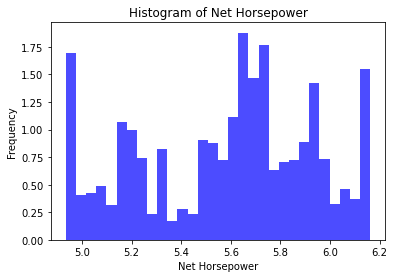

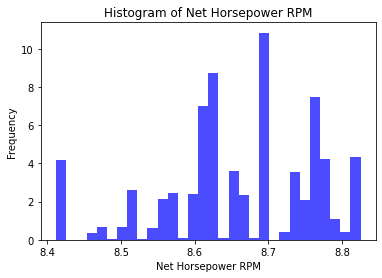

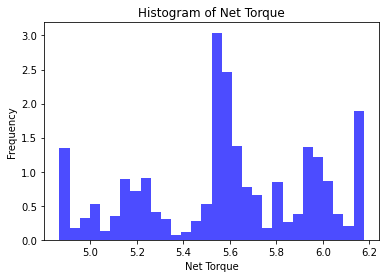

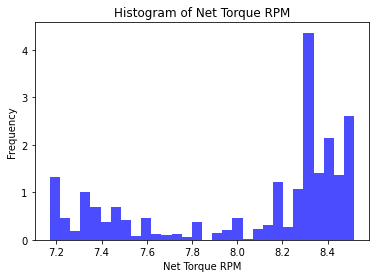

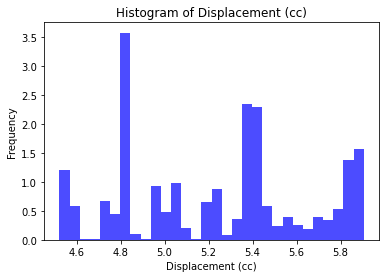

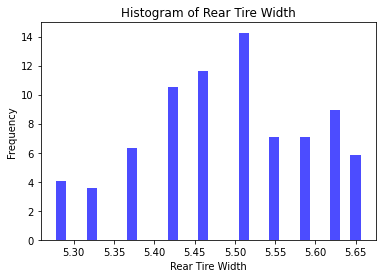

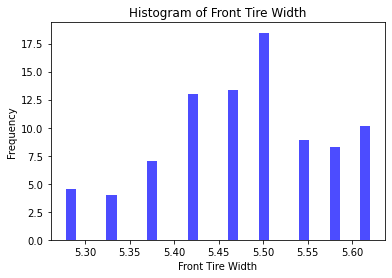

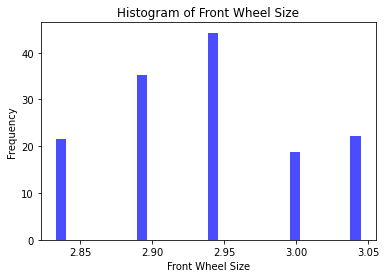

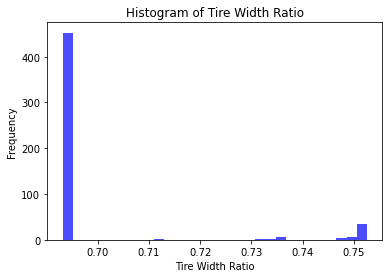

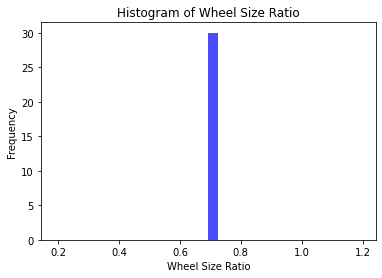

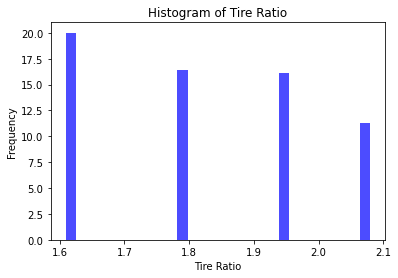

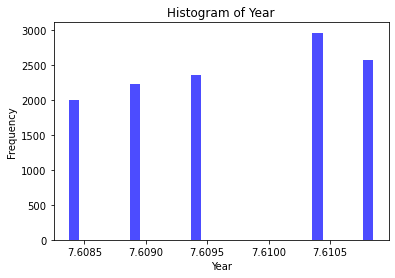

In [30]:
for col in x_data.select_dtypes(include=['float', 'int']).columns:
    plt.figure()
    plt.hist(x_data[col], bins=30, density=True, alpha=0.7, color='blue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + col)
    plt.show()

In [31]:
categorical_columns = x_data.select_dtypes(include=['object']).columns

In [32]:
x_data

,Unnamed: 0,Car_Make_Model_Style,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),Front Hip Room (in),...,Engine Configuration,Engine Class,Displacement (cc),Rear Tire Width,Front Tire Width,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,6.350886,2019 Acura RDX Specs: FWD w/Technology Pkg,FWD w/Technology Pkg,Front Wheel Drive,1.791759,1.609438,Sport Utility,Small Sport Utility Vehicles 2WD,8.240385,4.025352,...,I,Turbocharged,4.812184,5.463832,5.463832,2.995732,0.693147,0.693147,1.791759,7.610853
1,6.350886,2019 Acura RDX Specs: FWD w/Advance Pkg,FWD w/Advance Pkg,Front Wheel Drive,1.791759,1.609438,Sport Utility,Small Sport Utility Vehicles 2WD,8.250620,4.025352,...,I,Turbocharged,4.812184,5.463832,5.463832,2.995732,0.693147,0.693147,1.791759,7.610853
2,6.350886,2019 Acura RDX Specs: FWD w/A-Spec Pkg,FWD w/A-Spec Pkg,Front Wheel Drive,1.791759,1.609438,Sport Utility,Small Sport Utility Vehicles 2WD,8.248529,4.025352,...,I,Turbocharged,4.812184,5.545177,5.545177,3.044522,0.693147,0.693147,1.609438,7.610853
3,6.350886,2019 Acura RDX Specs: FWD,FWD,Front Wheel Drive,1.791759,1.609438,Sport Utility,Small Sport Utility Vehicles 2WD,8.238537,4.025352,...,I,Turbocharged,4.812184,5.463832,5.463832,2.995732,0.693147,0.693147,1.791759,7.610853
4,6.350886,2019 Acura RDX Specs: AWD w/Technology Pkg,AWD w/Technology Pkg,All Wheel Drive,1.791759,1.609438,Sport Utility,Small Sport Utility Vehicles 4WD,8.300777,4.025352,...,I,Turbocharged,4.812184,5.463832,5.463832,2.995732,0.693147,0.693147,1.791759,7.610853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11452,9.295141,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,T5 AWD Platinum,All Wheel Drive,1.791759,1.609438,4dr Car,Mid-Size Station Wagon,8.274102,4.023564,...,I,Intercooled,4.795791,5.463832,5.463832,2.944439,0.693147,0.693147,1.791759,7.610358
11453,9.295141,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,4dr Wgn T5 AWD,All Wheel Drive,1.791759,1.609438,4dr Car,Mid-Size Station Wagon,8.189522,4.023564,...,I,Intercooled,5.043425,5.463832,5.463832,2.944439,0.693147,0.693147,1.791759,7.609367
11454,9.295141,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,4dr Wgn T5 Platinum AWD,All Wheel Drive,1.791759,1.609438,4dr Car,Mid-Size Station Wagon,8.189522,4.023564,...,I,Intercooled,5.043425,5.463832,5.463832,2.944439,0.693147,0.693147,1.791759,7.609367
11455,9.295141,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,2015.5 4dr Wgn T5 AWD,All Wheel Drive,1.791759,1.609438,4dr Car,Mid-Size Station Wagon,8.189522,4.023564,...,I,Intercooled,5.043425,5.463832,5.463832,2.944439,0.693147,0.693147,1.791759,7.608871


In [33]:
categorical_columns

Index(['Car_Make_Model_Style', 'Style Name', 'Drivetrain', 'Body Style',
       'EPA Classification', 'Fuel System', 'Steering Type',
       'Front Wheel Material', 'Suspension Type - Front',
       'Suspension Type - Rear', 'Other Features', 'Corrosion Miles/km',
       'Engine Configuration', 'Engine Class'],
      dtype='object')

## To find better categorical values

In [34]:
from scipy.stats import chi2_contingency
cramer_v = pd.DataFrame(index=categorical_columns, columns=['V'])
for col in categorical_columns:
    confusion_matrix = pd.crosstab(x_data[col], dropped_car_data['MSRP'])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    cramer_v.loc[col, 'V'] = cramers_v

print(cramer_v)

                                V
Car_Make_Model_Style          NaN
Style Name               0.199565
Drivetrain               0.451803
Body Style               0.344629
EPA Classification       0.333949
Fuel System              0.382316
Steering Type            0.391684
Front Wheel Material     0.448007
Suspension Type - Front  0.353931
Suspension Type - Rear   0.395011
Other Features           0.308085
Corrosion Miles/km       0.349771
Engine Configuration     0.457383
Engine Class             0.344034


In [37]:
for col in Yes_no_columns:  # loop through all columns except target
    zero_val = dropped_car_data[dropped_car_data[col] == 0]['MSRP']
    one_val = dropped_car_data[dropped_car_data[col] == 1]['MSRP']
    t_stat, p_val = stats.ttest_ind(zero_val, one_val)
    print(f"T-test result for column '{col}': t-statistic={t_stat:.2f}, p-value={p_val:.4f}")

T-test result for column 'Air Bag-Passenger Switch (On/Off)': t-statistic=nan, p-value=nan
T-test result for column 'Air Bag-Side Body-Front': t-statistic=nan, p-value=nan
T-test result for column 'Air Bag-Side Body-Rear': t-statistic=nan, p-value=nan
T-test result for column 'Air Bag-Side Head-Front': t-statistic=nan, p-value=nan
T-test result for column 'Air Bag-Side Head-Rear': t-statistic=nan, p-value=nan
T-test result for column 'Brakes-ABS': t-statistic=nan, p-value=nan
T-test result for column 'Child Safety Rear Door Locks': t-statistic=nan, p-value=nan
T-test result for column 'Daytime Running Lights': t-statistic=nan, p-value=nan
T-test result for column 'Traction Control': t-statistic=nan, p-value=nan
T-test result for column 'Night Vision': t-statistic=nan, p-value=nan
T-test result for column 'Rollover Protection Bars': t-statistic=nan, p-value=nan
T-test result for column 'Fog Lamps': t-statistic=nan, p-value=nan
T-test result for column 'Parking Aid': t-statistic=nan, p-v

In [35]:
corr_dict = {}
for col in x_data.select_dtypes(include=['int64','float']).columns:
    corr, p_value = stats.pearsonr(x_data[col], dropped_car_data['MSRP'])
    corr_dict[col] = corr

In [36]:
corr_dict

{'Unnamed: 0': -0.1712400040020208,
 'Passenger Capacity': -0.07836308662163657,
 'Passenger Doors': -0.1466825707626637,
 'Base Curb Weight (lbs)': 0.3753811219716071,
 'Front Hip Room (in)': 0.30978376521815776,
 'Front Leg Room (in)': 0.05535136299695796,
 'Second Shoulder Room (in)': 0.02129050469403084,
 'Passenger Volume': 0.044547324745978584,
 'Second Head Room (in)': -0.12816221249410156,
 'Front Shoulder Room (in)': 0.11813390504057796,
 'Second Hip Room (in)': 0.08723608696698829,
 'Front Head Room (in)': -0.09419108891196713,
 'Second Leg Room (in)': 0.04683959879687223,
 'Wheelbase (in)': 0.17295262123283073,
 'Track Width, Front (in)': 0.3333282848617361,
 'Width, Max w/o mirrors (in)': 0.4045813305905973,
 'Track Width, Rear (in)': 0.31010367795523613,
 'Height, Overall (in)': -0.07397790142525949,
 'Fuel Tank Capacity, Approx (gal)': 0.39223484899180094,
 'Fuel Economy Est-Combined (MPG)': -0.5337241392478532,
 'First Gear Ratio (:1)': 0.3030327114078625,
 'Fourth Gear 